<B/><span style="font-family:BatangChe; font-size:2em;"><font color="Blue"/>Problem Statement

<span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>A Non-Banking Financial Company (NBFC) is a company registered under the Companies Act,1956 engaged in the business of loans and advances etc.Foreclosure is a legal process in which a lender attempts to recover the balance of a loan from a borrower who has stopped making payments to the lender by forcing the sale of the asset used as the collateral for the loan. Foreclosures costs are high and lenders want to find a suitable solution to avoid foreclosures.

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir('C:/Users/Neethu/Documents/Great Learning/Projects/Great Learning/project/NBFC')
os.getcwd()

'C:\\Users\\Neethu\\Documents\\Great Learning\\Projects\\Great Learning\\project\\NBFC'

In [3]:
df=pd.read_excel('NBFC Loan Transaction Data.xlsx')

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>check the head of the dataset

In [4]:
df.head()

AGREEMENTID AUTHORIZATIONDATE  BALANCE_EXCESS  BALANCE_TENURE    CITY  \
0     11220001        2010-08-29             0.0               0  MUMBAI   
1     11220002        2010-09-15             0.0              99  MUMBAI   
2     11220006        2010-11-02             0.0             231  MUMBAI   
3     11220008        2010-10-06             0.0               0   THANE   
4     11220010        2010-10-26             0.0             215  MUMBAI   

   COMPLETED_TENURE  CURRENT_INTEREST_RATE  CURRENT_INTEREST_RATE_MAX  \
0                45              13.421934                  13.734072   
1                38              13.734072                  13.734072   
2                81              15.606900                  16.231176   
3                91              11.236968                  13.734072   
4                89              14.982624                  15.606900   

   CURRENT_INTEREST_RATE_MIN  CURRENT_INTEREST_RATE_CHANGES  ...  \
0                  13.421934                              1  ...   
1                  13.734072                              0  ...   
2                  15.606900                              2  ...   
3                  11.236968                              4  ...   
4                  14.982624                              2  ...   

   PAID_PRINCIPAL  PRE_EMI_DUEAMT  PRE_EMI_OS_AMOUNT  PRE_EMI_RECEIVED_AMT  \
0    1.159366e+07     7994.273589                0.0           7994.273589   
1    6.942656e+06   100504.575864                0.0         100504.575864   
2    9.392115e+05     5947.630536                0.0           5947.630536   
3    9.979637e+06    60322.180776                0.0          60322.180776   
4    5.552847e+05    27732.787464                0.0          27732.787464   

   PRODUCT    SCHEMEID  NPA_IN_LAST_MONTH  NPA_IN_CURRENT_MONTH  MOB  \
0       HL  10901100.0                NaN                   NaN   45   
1       HL  10901100.0                NaN                   NaN   38   
2       HL  10901101.0                NaN                   NaN   81   
3       HL  10901100.0                NaN                   NaN   91   
4       HL  10901101.0                NaN                   NaN   90   

   FORECLOSURE  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 53 columns]

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Shape of the data

In [5]:
df.shape

(20012, 53)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Type of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Missing Values & Treatment

In [8]:
df.isna().sum()

AGREEMENTID                                0
AUTHORIZATIONDATE                          0
BALANCE_EXCESS                             0
BALANCE_TENURE                             0
CITY                                       0
COMPLETED_TENURE                           0
CURRENT_INTEREST_RATE                      0
CURRENT_INTEREST_RATE_MAX                  0
CURRENT_INTEREST_RATE_MIN                  0
CURRENT_INTEREST_RATE_CHANGES              0
CURRENT_TENOR                              0
CUSTOMERID                               281
DIFF_AUTH_INT_DATE                         0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN         0
DIFF_EMI_AMOUNT_MAX_MIN                   89
DIFF_ORIGINAL_CURRENT_INTEREST_RATE        0
DIFF_ORIGINAL_CURRENT_TENOR                0
DPD                                        0
DUEDAY                                     0
EMI_AMOUNT                                 0
EMI_DUEAMT                                 0
EMI_OS_AMOUNT                              0
EMI_RECEIV

In [9]:
df.isnull().sum()[df.isnull().sum()>0]

CUSTOMERID                    281
DIFF_EMI_AMOUNT_MAX_MIN        89
LAST_RECEIPT_AMOUNT           247
LAST_RECEIPT_DATE              75
LATEST_TRANSACTION_MONTH       75
MAX_EMI_AMOUNT                 89
MIN_EMI_AMOUNT                 89
SCHEMEID                      281
NPA_IN_LAST_MONTH           19893
NPA_IN_CURRENT_MONTH        19893
dtype: int64

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Percentage of data missing

In [10]:
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)[df.isnull().sum()>0]

CUSTOMERID                   1.40
DIFF_EMI_AMOUNT_MAX_MIN      0.44
LAST_RECEIPT_AMOUNT          1.23
LAST_RECEIPT_DATE            0.37
LATEST_TRANSACTION_MONTH     0.37
MAX_EMI_AMOUNT               0.44
MIN_EMI_AMOUNT               0.44
SCHEMEID                     1.40
NPA_IN_LAST_MONTH           99.41
NPA_IN_CURRENT_MONTH        99.41
dtype: float64

<I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>We have 99% data missing for variables NPA current month and NPA last month, hence this variables are removed from the dataset as per the rule that if any data has more than 68% of missing values that variables can be removed from the dataset.

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Distinguishing the Categorical variable and Numeric Variable in dataset

In [11]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['CITY', 'PRODUCT', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH']
['AGREEMENTID', 'AUTHORIZATIONDATE', 'BALANCE_EXCESS', 'BALANCE_TENURE', 'COMPLETED_TENURE', 'CURRENT_INTEREST_RATE', 'CURRENT_INTEREST_RATE_MAX', 'CURRENT_INTEREST_RATE_MIN', 'CURRENT_INTEREST_RATE_CHANGES', 'CURRENT_TENOR', 'CUSTOMERID', 'DIFF_AUTH_INT_DATE', 'DIFF_CURRENT_INTEREST_RATE_MAX_MIN', 'DIFF_EMI_AMOUNT_MAX_MIN', 'DIFF_ORIGINAL_CURRENT_INTEREST_RATE', 'DIFF_ORIGINAL_CURRENT_TENOR', 'DPD', 'DUEDAY', 'EMI_AMOUNT', 'EMI_DUEAMT', 'EMI_OS_AMOUNT', 'EMI_RECEIVED_AMT', 'EXCESS_ADJUSTED_AMT', 'EXCESS_AVAILABLE', 'FOIR', 'INTEREST_START_DATE', 'LAST_RECEIPT_AMOUNT', 'LAST_RECEIPT_DATE', 'LATEST_TRANSACTION_MONTH', 'LOAN_AMT', 'MAX_EMI_AMOUNT', 'MIN_EMI_AMOUNT', 'MONTHOPENING', 'NET_DISBURSED_AMT', 'NET_LTV', 'NET_RECEIVABLE', 'NUM_EMI_CHANGES', 'NUM_LOW_FREQ_TRANSACTIONS', 'ORIGNAL_INTEREST_RATE', 'ORIGNAL_TENOR', 'OUTSTANDING_PRINCIPAL', 'PAID_INTEREST', 'PAID_PRINCIPAL', 'PRE_EMI_DUEAMT', 'PRE_EMI_OS_AMOUNT', 'PRE_EM

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Dropping the irrelavant variables in dataset

In [12]:
df= df.drop('NPA_IN_LAST_MONTH', axis=1)
df= df.drop('NPA_IN_CURRENT_MONTH', axis=1)
df= df.drop('MOB', axis=1)
df= df.drop('AGREEMENTID', axis=1)
df= df.drop('NET_RECEIVABLE', axis=1)
df= df.drop('CUSTOMERID', axis=1)
df= df.drop('SCHEMEID', axis=1)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Missing Value Treatment

In [13]:
df=df.dropna(subset=['DIFF_EMI_AMOUNT_MAX_MIN', 'MAX_EMI_AMOUNT','MIN_EMI_AMOUNT'])

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)

In [15]:
df.LAST_RECEIPT_AMOUNT=df.LAST_RECEIPT_AMOUNT.fillna((df.LAST_RECEIPT_AMOUNT.median()))

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Validation of Missing Value Treatment

In [16]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [17]:
df= df.drop('CITY', axis=1)

In [18]:
df_new=df.copy()

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Count of the Product variables

In [19]:
for column in df_new.columns:
    if df_new[column].dtype == 'object':
        print(column.upper(),': ',df_new[column].nunique())
        print(df_new[column].value_counts().sort_values())
        print('\n')

PRODUCT :  4
STLAP    3027
HL       3479
LAP      6157
STHL     7260
Name: PRODUCT, dtype: int64




<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Duplicates of the dataset

In [20]:
dups = df_new.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_new[dups]

Number of duplicate rows = 1


AUTHORIZATIONDATE  BALANCE_EXCESS  BALANCE_TENURE  COMPLETED_TENURE  \
13127        2018-01-31             0.0             118                10   

       CURRENT_INTEREST_RATE  CURRENT_INTEREST_RATE_MAX  \
13127              11.798816                  11.798816   

       CURRENT_INTEREST_RATE_MIN  CURRENT_INTEREST_RATE_CHANGES  \
13127                  10.612692                              2   

       CURRENT_TENOR  DIFF_AUTH_INT_DATE  ...  ORIGNAL_INTEREST_RATE  \
13127            128                   0  ...              10.612692   

       ORIGNAL_TENOR  OUTSTANDING_PRINCIPAL  PAID_INTEREST  PAID_PRINCIPAL  \
13127            120           6.420700e+06  490778.100907   357650.695842   

       PRE_EMI_DUEAMT  PRE_EMI_OS_AMOUNT  PRE_EMI_RECEIVED_AMT  PRODUCT  \
13127    11773.790712                0.0          11773.790712       HL   

       FORECLOSURE  
13127            0  

[1 rows x 45 columns]

In [21]:
df_new.drop_duplicates(inplace= True)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Statistical Analysis of the Dataset

In [22]:
df_new.describe().T

count          mean           std  \
BALANCE_EXCESS                       19922.0  7.935285e+04  1.351669e+06   
BALANCE_TENURE                       19922.0  1.728363e+02  6.408975e+01   
COMPLETED_TENURE                     19922.0  1.734660e+01  1.648285e+01   
CURRENT_INTEREST_RATE                19922.0  1.478746e+01  2.486568e+00   
CURRENT_INTEREST_RATE_MAX            19922.0  1.490631e+01  2.480436e+00   
CURRENT_INTEREST_RATE_MIN            19922.0  1.430529e+01  2.679236e+00   
CURRENT_INTEREST_RATE_CHANGES        19922.0  7.614195e-01  1.135714e+00   
CURRENT_TENOR                        19922.0  1.901829e+02  5.861301e+01   
DIFF_AUTH_INT_DATE                   19922.0  6.324666e-03  5.709182e-01   
DIFF_CURRENT_INTEREST_RATE_MAX_MIN   19922.0  6.010183e-01  9.682787e-01   
DIFF_EMI_AMOUNT_MAX_MIN              19922.0  1.152124e+05  9.671066e+05   
DIFF_ORIGINAL_CURRENT_INTEREST_RATE  19922.0 -3.821632e-01  8.827221e-01   
DIFF_ORIGINAL_CURRENT_TENOR          19922.0 -6.826674e+00  3.359832e+01   
DPD                                  19922.0  7.601948e+00  6.624560e+01   
DUEDAY                               19922.0  5.776629e+00  2.719192e+00   
EMI_AMOUNT                           19922.0  4.380370e+04  1.133494e+05   
EMI_DUEAMT                           19922.0  2.000488e+06  6.852523e+06   
EMI_OS_AMOUNT                        19922.0  3.344777e+04  6.576078e+05   
EMI_RECEIVED_AMT                     19922.0  1.967040e+06  6.776973e+06   
EXCESS_ADJUSTED_AMT                  19922.0  3.615252e+05  3.932123e+06   
EXCESS_AVAILABLE                     19922.0  4.408781e+05  4.179063e+06   
FOIR                                 19922.0  2.808247e+01  3.879799e+03   
LAST_RECEIPT_AMOUNT                  19922.0  8.019165e+04  8.052290e+05   
LATEST_TRANSACTION_MONTH             19922.0  1.069556e+01  2.818066e+00   
LOAN_AMT                             19922.0  5.853776e+06  1.293893e+07   
MAX_EMI_AMOUNT                       19922.0  1.222578e+05  9.704758e+05   
MIN_EMI_AMOUNT                       19922.0  7.045373e+03  4.342655e+04   
MONTHOPENING                         19922.0  5.403187e+06  1.178172e+07   
NET_DISBURSED_AMT                    19922.0  5.805131e+06  1.286590e+07   
NET_LTV                              19922.0  5.121481e+01  2.110373e+01   
NUM_EMI_CHANGES                      19922.0  2.967523e+00  2.628152e+00   
NUM_LOW_FREQ_TRANSACTIONS            19922.0  2.780845e+00  2.571005e+00   
ORIGNAL_INTEREST_RATE                19922.0  1.440530e+01  2.605073e+00   
ORIGNAL_TENOR                        19922.0  1.833562e+02  4.460779e+01   
OUTSTANDING_PRINCIPAL                19922.0  5.167599e+06  1.146060e+07   
PAID_INTEREST                        19922.0  9.934833e+05  3.032159e+06   
PAID_PRINCIPAL                       19922.0  8.706615e+05  3.477582e+07   
PRE_EMI_DUEAMT                       19922.0  5.803236e+04  3.784957e+05   
PRE_EMI_OS_AMOUNT                    19922.0  2.498768e+02  1.093384e+04   
PRE_EMI_RECEIVED_AMT                 19922.0  5.778248e+04  3.778014e+05   
FORECLOSURE                          19922.0  9.010140e-02  2.863342e-01   

                                              min           25%           50%  \
BALANCE_EXCESS                           0.000000  0.000000e+00  0.000000e+00   
BALANCE_TENURE                           0.000000  1.360000e+02  1.740000e+02   
COMPLETED_TENURE                         0.000000  6.000000e+00  1.200000e+01   
CURRENT_INTEREST_RATE                    9.901017  1.279766e+01  1.454563e+01   
CURRENT_INTEREST_RATE_MAX               10.425409  1.310980e+01  1.467049e+01   
CURRENT_INTEREST_RATE_MIN               -5.056636  1.242309e+01  1.373407e+01   
CURRENT_INTEREST_RATE_CHANGES            0.000000  0.000000e+00  0.000000e+00   
CURRENT_TENOR                            6.000000  1.660000e+02  1.800000e+02   
DIFF_AUTH_INT_DATE                     -17.000000  0.000000e+00  0.000000e+00   
DIFF_CURRENT_INTEREST_RATE_MAX_MIN  

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Correlation of the Dataset

In [23]:
df_new.corr()

BALANCE_EXCESS  BALANCE_TENURE  \
BALANCE_EXCESS                             1.000000       -0.013133   
BALANCE_TENURE                            -0.013133        1.000000   
COMPLETED_TENURE                           0.019912       -0.446664   
CURRENT_INTEREST_RATE                     -0.008549       -0.386567   
CURRENT_INTEREST_RATE_MAX                 -0.002728       -0.430053   
CURRENT_INTEREST_RATE_MIN                 -0.006086       -0.394783   
CURRENT_INTEREST_RATE_CHANGES              0.005594        0.005432   
CURRENT_TENOR                             -0.008761        0.967830   
DIFF_AUTH_INT_DATE                        -0.000664       -0.018313   
DIFF_CURRENT_INTEREST_RATE_MAX_MIN         0.009853       -0.009296   
DIFF_EMI_AMOUNT_MAX_MIN                    0.547712       -0.078512   
DIFF_ORIGINAL_CURRENT_INTEREST_RATE        0.017964       -0.230989   
DIFF_ORIGINAL_CURRENT_TENOR                0.001425       -0.640273   
DPD                                        0.103812       -0.059993   
DUEDAY                                     0.022022       -0.202663   
EMI_AMOUNT                                 0.098885       -0.131490   
EMI_DUEAMT                                 0.073013       -0.214689   
EMI_OS_AMOUNT                              0.243618       -0.026600   
EMI_RECEIVED_AMT                           0.050187       -0.214501   
EXCESS_ADJUSTED_AMT                        0.016554       -0.141577   
EXCESS_AVAILABLE                           0.339014       -0.137459   
FOIR                                      -0.000414       -0.013248   
LAST_RECEIPT_AMOUNT                        0.535345       -0.056199   
LATEST_TRANSACTION_MONTH                  -0.076322        0.175632   
LOAN_AMT                                   0.109378       -0.062687   
MAX_EMI_AMOUNT                             0.549164       -0.080764   
MIN_EMI_AMOUNT                             0.074957       -0.056409   
MONTHOPENING                               0.114777       -0.027149   
NET_DISBURSED_AMT                          0.110076       -0.063411   
NET_LTV                                    0.002525        0.277899   
NUM_EMI_CHANGES                            0.036255       -0.206953   
NUM_LOW_FREQ_TRANSACTIONS                  0.036372       -0.271194   
ORIGNAL_INTEREST_RATE                     -0.002073       -0.447252   
ORIGNAL_TENOR                             -0.010438        0.789444   
OUTSTANDING_PRINCIPAL                      0.109266        0.004941   
PAID_INTEREST                              0.059017       -0.175719   
PAID_PRINCIPAL                             0.002508       -0.039431   
PRE_EMI_DUEAMT                             0.028949       -0.046205   
PRE_EMI_OS_AMOUNT                         -0.000056        0.008473   
PRE_EMI_RECEIVED_AMT                       0.029004       -0.046536   
FORECLOSURE                                0.016418       -0.053650   

                                     COMPLETED_TENURE  CURRENT_INTEREST_RATE  \
BALANCE_EXCESS                               0.019912              -0.008549   
BALANCE_TENURE                              -0.446664              -0.386567   
COMPLETED_TENURE                             1.000000               0.243549   
CURRENT_INTEREST_RATE                        0.243549               1.000000   
CURRENT_INTEREST_RATE_MAX                    0.327557               0.975515   
CURRENT_INTEREST_RATE_MIN                    0.199552               0.959179   
CURRENT_INTEREST_RATE_CHANGES                0.368005              -0.211880   
CURRENT_TENOR                               -0.207185              -0.354197   
DIFF_AUTH_INT_DATE                           0.044197               0.013782   
DIFF_CURRENT_INTEREST_RATE_MAX_MIN           0.286939              -0.155084   
DIFF_EMI_AMOUNT_MAX_MIN                      0.043943              -0.007135   
DIFF_ORIGINAL_CURRENT_INTEREST_RATE          0.107714              -0.040049   
DIFF_ORIGINAL_

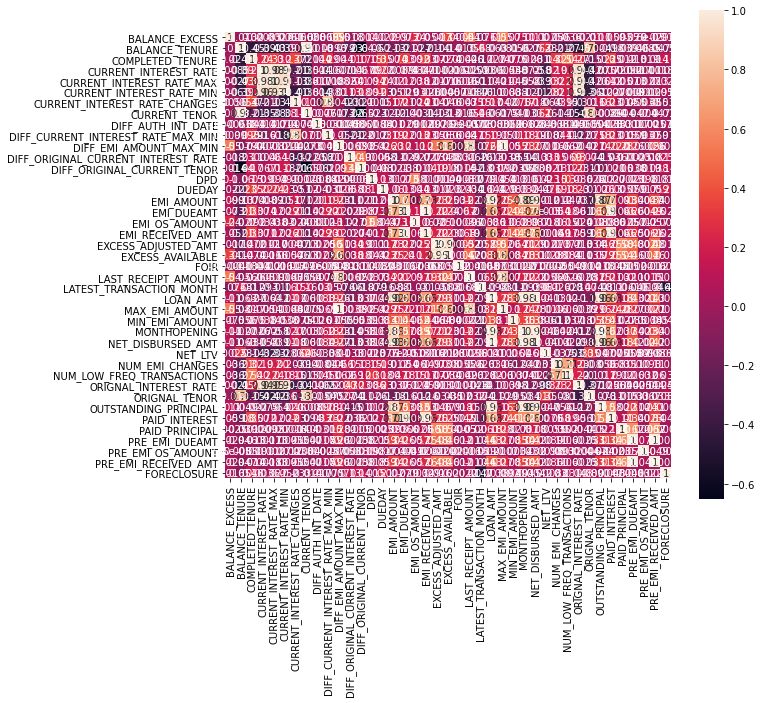

In [24]:
corrmat = df_new.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, square=True, annot=True);

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Multivariate Analysis

In [25]:
expr= 'FORECLOSURE ~ NET_DISBURSED_AMT+BALANCE_EXCESS+BALANCE_TENURE+ COMPLETED_TENURE+ CURRENT_INTEREST_RATE+ CURRENT_INTEREST_RATE_MAX + CURRENT_INTEREST_RATE_MIN + CURRENT_INTEREST_RATE_CHANGES+ CURRENT_TENOR+ DIFF_AUTH_INT_DATE + DIFF_CURRENT_INTEREST_RATE_MAX_MIN+ DIFF_EMI_AMOUNT_MAX_MIN + DIFF_ORIGINAL_CURRENT_INTEREST_RATE +DIFF_ORIGINAL_CURRENT_TENOR + DPD + EMI_AMOUNT+ EMI_DUEAMT+ EMI_OS_AMOUNT+ EMI_RECEIVED_AMT+ EXCESS_ADJUSTED_AMT+ EXCESS_AVAILABLE+ FOIR+ LAST_RECEIPT_AMOUNT+ LATEST_TRANSACTION_MONTH+ LOAN_AMT+ MAX_EMI_AMOUNT+ MIN_EMI_AMOUNT+ MONTHOPENING+ NET_LTV+ NUM_EMI_CHANGES+ NUM_LOW_FREQ_TRANSACTIONS+ ORIGNAL_INTEREST_RATE+ ORIGNAL_TENOR+ OUTSTANDING_PRINCIPAL+ PAID_INTEREST+ PAID_PRINCIPAL+ PRE_EMI_DUEAMT+ PRE_EMI_OS_AMOUNT+ PRE_EMI_RECEIVED_AMT'

In [26]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = df_new).fit()
lm1.params

Intercept                              3.943675e-01
NET_DISBURSED_AMT                      6.832556e-09
BALANCE_EXCESS                        -5.981854e+00
BALANCE_TENURE                        -7.562791e-04
COMPLETED_TENURE                       1.434490e-03
CURRENT_INTEREST_RATE                 -3.768561e-02
CURRENT_INTEREST_RATE_MAX              2.618348e-02
CURRENT_INTEREST_RATE_MIN              3.931184e-02
CURRENT_INTEREST_RATE_CHANGES          2.686147e-02
CURRENT_TENOR                          6.265591e-04
DIFF_AUTH_INT_DATE                    -3.022089e-03
DIFF_CURRENT_INTEREST_RATE_MAX_MIN    -1.307118e-02
DIFF_EMI_AMOUNT_MAX_MIN               -2.079273e-06
DIFF_ORIGINAL_CURRENT_INTEREST_RATE    9.574673e-03
DIFF_ORIGINAL_CURRENT_TENOR            3.216892e-04
DPD                                   -8.419515e-05
EMI_AMOUNT                             2.054981e-07
EMI_DUEAMT                            -9.857205e+00
EMI_OS_AMOUNT                          9.857205e+00
EMI_RECEIVED

In [27]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            FORECLOSURE   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     214.9
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:20:24   Log-Likelihood:                -315.83
No. Observations:               19922   AIC:                             699.7
Df Residuals:                   19888   BIC:                             968.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [28]:
df_new= df_new.drop('BALANCE_EXCESS', axis=1)
df_new= df_new.drop('NET_DISBURSED_AMT', axis=1)
df_new= df_new.drop('BALANCE_TENURE', axis=1)
df_new= df_new.drop('DIFF_AUTH_INT_DATE', axis=1)
df_new= df_new.drop('CURRENT_INTEREST_RATE_CHANGES', axis=1)
df_new= df_new.drop('DIFF_CURRENT_INTEREST_RATE_MAX_MIN', axis=1)
df_new= df_new.drop('DIFF_EMI_AMOUNT_MAX_MIN', axis=1)
df_new= df_new.drop('DPD', axis=1)
df_new= df_new.drop('EMI_DUEAMT', axis=1)
df_new=df_new.drop('EMI_OS_AMOUNT',axis=1)
df_new=df_new.drop('EMI_RECEIVED_AMT',axis=1)
df_new=df_new.drop('EXCESS_ADJUSTED_AMT',axis=1)
df_new=df_new.drop('EXCESS_AVAILABLE',axis=1)
df_new=df_new.drop('FOIR',axis=1)
df_new=df_new.drop('MAX_EMI_AMOUNT',axis=1)
df_new=df_new.drop('MIN_EMI_AMOUNT',axis=1)
df_new=df_new.drop('NET_LTV',axis=1)
df_new=df_new.drop('NUM_EMI_CHANGES',axis=1)
df_new=df_new.drop('PRE_EMI_DUEAMT',axis=1)
df_new=df_new.drop('PRE_EMI_OS_AMOUNT',axis=1)
df_new=df_new.drop('MONTHOPENING',axis=1)
df_new=df_new.drop('OUTSTANDING_PRINCIPAL',axis=1)

In [29]:
df_new=df_new.drop('AUTHORIZATIONDATE',axis=1)
df_new=df_new.drop('LAST_RECEIPT_DATE',axis=1)
df_new=df_new.drop('INTEREST_START_DATE',axis=1)
df_new=df_new.drop('CURRENT_INTEREST_RATE_MAX',axis=1)
df_new=df_new.drop('CURRENT_INTEREST_RATE_MIN',axis=1)
df_new=df_new.drop('DIFF_ORIGINAL_CURRENT_INTEREST_RATE',axis=1)

In [30]:
df_new.shape

(19922, 17)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Box plot/ Outlier identification

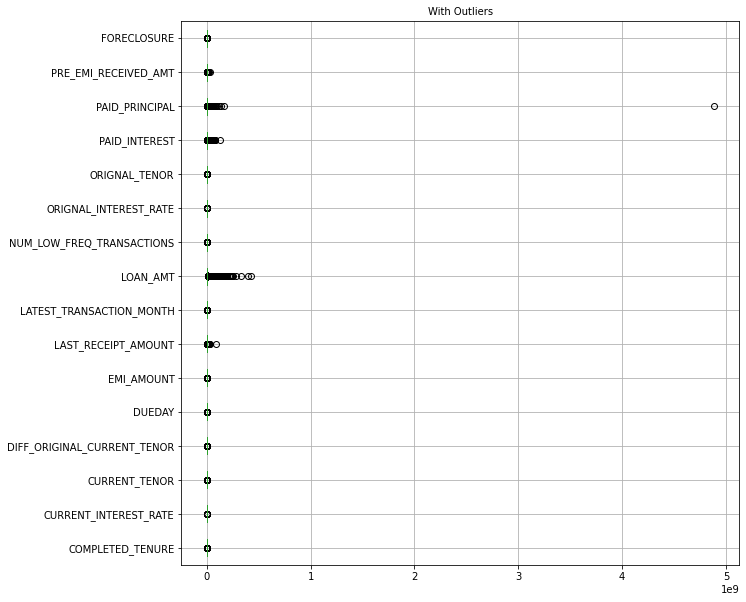

In [31]:
import matplotlib.style
cont=df_new.dtypes[(df_new.dtypes!='uint8') & (df_new.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_new[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=10)
plt.show()

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Treatment of Outliers

In [32]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [33]:
lr,ur=remove_outlier(df_new['COMPLETED_TENURE'])
df_new['COMPLETED_TENURE']=np.where(df_new['COMPLETED_TENURE']>ur,ur,df_new['COMPLETED_TENURE'])
df_new['COMPLETED_TENURE']=np.where(df_new['COMPLETED_TENURE']<lr,lr,df_new['COMPLETED_TENURE'])

lr,ur=remove_outlier(df_new['CURRENT_INTEREST_RATE'])
df_new['CURRENT_INTEREST_RATE']=np.where(df_new['CURRENT_INTEREST_RATE']>ur,ur,df_new['CURRENT_INTEREST_RATE'])
df_new['CURRENT_INTEREST_RATE']=np.where(df_new['CURRENT_INTEREST_RATE']<lr,lr,df_new['CURRENT_INTEREST_RATE'])

lr,ur=remove_outlier(df_new['CURRENT_TENOR'])
df_new['CURRENT_TENOR']=np.where(df_new['CURRENT_TENOR']>ur,ur,df_new['CURRENT_TENOR'])
df_new['CURRENT_TENOR']=np.where(df_new['CURRENT_TENOR']<lr,lr,df_new['CURRENT_TENOR'])

lr,ur=remove_outlier(df_new['DIFF_ORIGINAL_CURRENT_TENOR'])
df_new['DIFF_ORIGINAL_CURRENT_TENOR']=np.where(df_new['DIFF_ORIGINAL_CURRENT_TENOR']>ur,ur,df_new['DIFF_ORIGINAL_CURRENT_TENOR'])
df_new['DIFF_ORIGINAL_CURRENT_TENOR']=np.where(df_new['DIFF_ORIGINAL_CURRENT_TENOR']<lr,lr,df_new['DIFF_ORIGINAL_CURRENT_TENOR'])

lr,ur=remove_outlier(df_new['DUEDAY'])
df_new['DUEDAY']=np.where(df_new['DUEDAY']>ur,ur,df_new['DUEDAY'])
df_new['DUEDAY']=np.where(df_new['DUEDAY']<lr,lr,df_new['DUEDAY'])

lr,ur=remove_outlier(df_new['EMI_AMOUNT'])
df_new['EMI_AMOUNT']=np.where(df_new['EMI_AMOUNT']>ur,ur,df_new['EMI_AMOUNT'])
df_new['EMI_AMOUNT']=np.where(df_new['EMI_AMOUNT']<lr,lr,df_new['EMI_AMOUNT'])

lr,ur=remove_outlier(df_new['LAST_RECEIPT_AMOUNT'])
df_new['LAST_RECEIPT_AMOUNT']=np.where(df_new['LAST_RECEIPT_AMOUNT']>ur,ur,df_new['LAST_RECEIPT_AMOUNT'])
df_new['LAST_RECEIPT_AMOUNT']=np.where(df_new['LAST_RECEIPT_AMOUNT']<lr,lr,df_new['LAST_RECEIPT_AMOUNT'])

lr,ur=remove_outlier(df_new['LATEST_TRANSACTION_MONTH'])
df_new['LATEST_TRANSACTION_MONTH']=np.where(df_new['LATEST_TRANSACTION_MONTH']>ur,ur,df_new['LATEST_TRANSACTION_MONTH'])
df_new['LATEST_TRANSACTION_MONTH']=np.where(df_new['LATEST_TRANSACTION_MONTH']<lr,lr,df_new['LATEST_TRANSACTION_MONTH'])

lr,ur=remove_outlier(df_new['LOAN_AMT'])
df_new['LOAN_AMT']=np.where(df_new['LOAN_AMT']>ur,ur,df_new['LOAN_AMT'])
df_new['LOAN_AMT']=np.where(df_new['LOAN_AMT']<lr,lr,df_new['LOAN_AMT'])

lr,ur=remove_outlier(df_new['NUM_LOW_FREQ_TRANSACTIONS'])
df_new['NUM_LOW_FREQ_TRANSACTIONS']=np.where(df_new['NUM_LOW_FREQ_TRANSACTIONS']>ur,ur,df_new['NUM_LOW_FREQ_TRANSACTIONS'])
df_new['NUM_LOW_FREQ_TRANSACTIONS']=np.where(df_new['NUM_LOW_FREQ_TRANSACTIONS']<lr,lr,df_new['NUM_LOW_FREQ_TRANSACTIONS'])

lr,ur=remove_outlier(df_new['ORIGNAL_INTEREST_RATE'])
df_new['ORIGNAL_INTEREST_RATE']=np.where(df_new['ORIGNAL_INTEREST_RATE']>ur,ur,df_new['ORIGNAL_INTEREST_RATE'])
df_new['ORIGNAL_INTEREST_RATE']=np.where(df_new['ORIGNAL_INTEREST_RATE']<lr,lr,df_new['ORIGNAL_INTEREST_RATE'])

lr,ur=remove_outlier(df_new['PAID_PRINCIPAL'])
df_new['PAID_PRINCIPAL']=np.where(df_new['PAID_PRINCIPAL']>ur,ur,df_new['PAID_PRINCIPAL'])
df_new['PAID_PRINCIPAL']=np.where(df_new['PAID_PRINCIPAL']<lr,lr,df_new['PAID_PRINCIPAL'])

lr,ur=remove_outlier(df_new['ORIGNAL_TENOR'])
df_new['ORIGNAL_TENOR']=np.where(df_new['ORIGNAL_TENOR']>ur,ur,df_new['ORIGNAL_TENOR'])
df_new['ORIGNAL_TENOR']=np.where(df_new['ORIGNAL_TENOR']<lr,lr,df_new['ORIGNAL_TENOR'])

lr,ur=remove_outlier(df_new['PAID_INTEREST'])
df_new['PAID_INTEREST']=np.where(df_new['PAID_INTEREST']>ur,ur,df_new['PAID_INTEREST'])
df_new['PAID_INTEREST']=np.where(df_new['PAID_INTEREST']<lr,lr,df_new['PAID_INTEREST'])

lr,ur=remove_outlier(df_new['PRE_EMI_RECEIVED_AMT'])
df_new['PRE_EMI_RECEIVED_AMT']=np.where(df_new['PRE_EMI_RECEIVED_AMT']>ur,ur,df_new['PRE_EMI_RECEIVED_AMT'])
df_new['PRE_EMI_RECEIVED_AMT']=np.where(df_new['PRE_EMI_RECEIVED_AMT']<lr,lr,df_new['PRE_EMI_RECEIVED_AMT'])

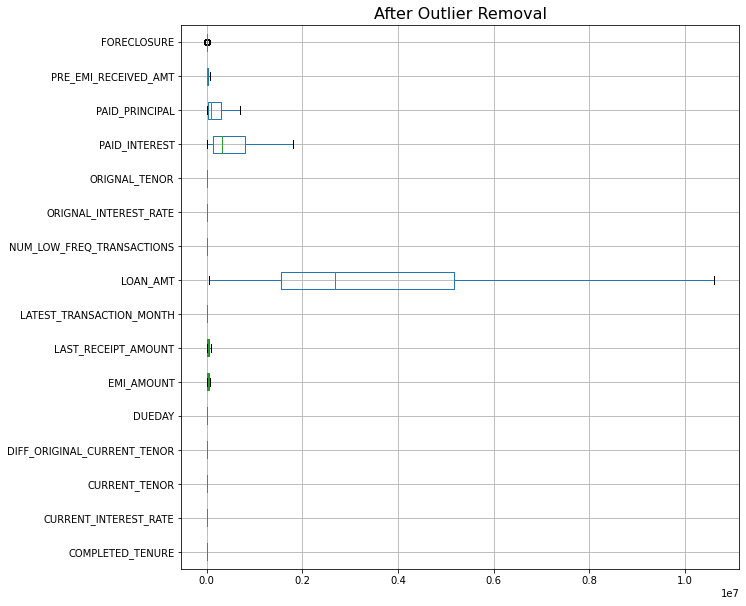

In [34]:
plt.figure(figsize=(10,10))
df_new[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Univariate & Bivariate Analysis

In [35]:
df_new.skew()

COMPLETED_TENURE               1.064651
CURRENT_INTEREST_RATE          0.274223
CURRENT_TENOR                 -0.063360
DIFF_ORIGINAL_CURRENT_TENOR   -0.713883
DUEDAY                         0.000000
EMI_AMOUNT                     1.067494
LAST_RECEIPT_AMOUNT            1.085838
LATEST_TRANSACTION_MONTH       0.000000
LOAN_AMT                       1.146028
NUM_LOW_FREQ_TRANSACTIONS      0.824734
ORIGNAL_INTEREST_RATE          0.394760
ORIGNAL_TENOR                  0.089892
PAID_INTEREST                  1.168169
PAID_PRINCIPAL                 1.230508
PRE_EMI_RECEIVED_AMT           1.175629
FORECLOSURE                    2.863366
dtype: float64

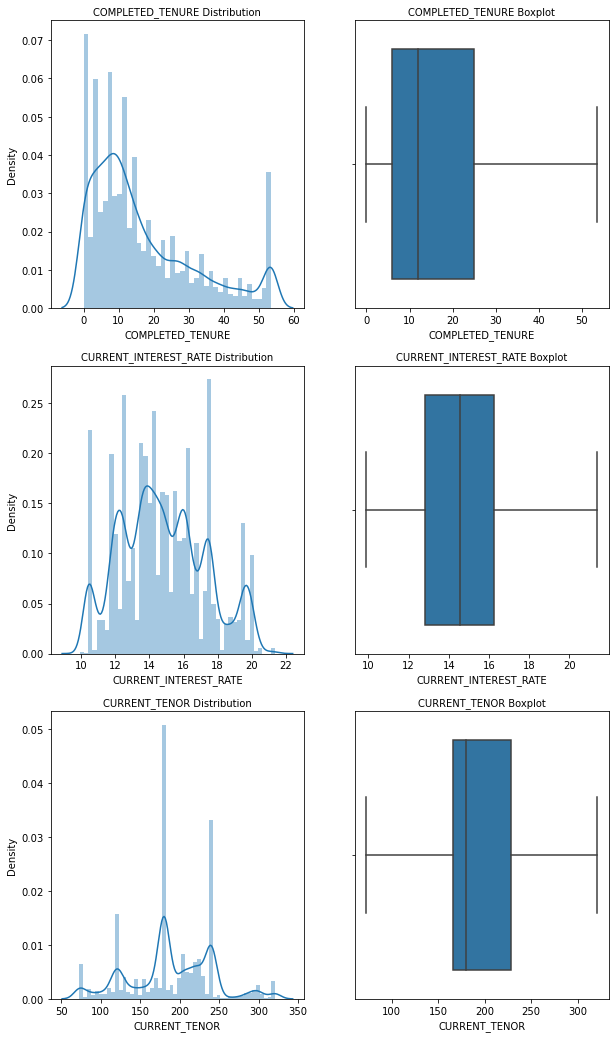

In [36]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)

a = sns.distplot(df_new['COMPLETED_TENURE'] , ax=axes[0][0])
a.set_title("COMPLETED_TENURE Distribution",fontsize=10)

a = sns.boxplot(df_new['COMPLETED_TENURE'] , orient = "v" , ax=axes[0][1])
a.set_title("COMPLETED_TENURE Boxplot",fontsize=10)


a = sns.distplot(df_new['CURRENT_INTEREST_RATE'] , ax=axes[1][0])
a.set_title("CURRENT_INTEREST_RATE Distribution",fontsize=10)

a = sns.boxplot(df_new['CURRENT_INTEREST_RATE'] , orient = "v" , ax=axes[1][1])
a.set_title("CURRENT_INTEREST_RATE Boxplot",fontsize=10)


a = sns.distplot(df_new['CURRENT_TENOR'] , ax=axes[2][0])
a.set_title("CURRENT_TENOR Distribution",fontsize=10)

a = sns.boxplot(df_new['CURRENT_TENOR'] , orient = "v" , ax=axes[2][1])
a.set_title("CURRENT_TENOR Boxplot",fontsize=10)

plt.show()

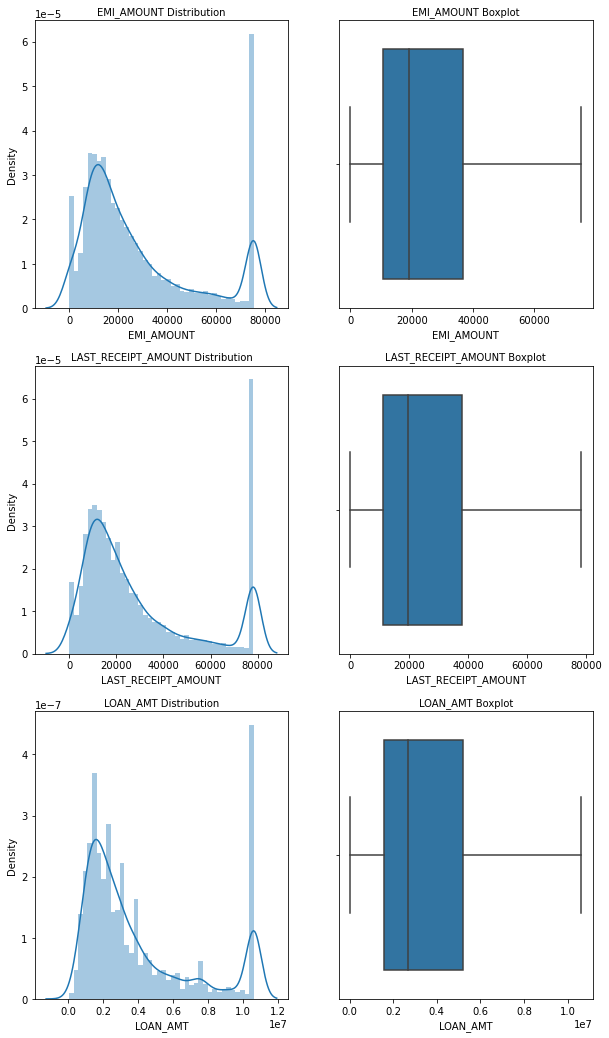

In [37]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)

a = sns.distplot(df_new['EMI_AMOUNT'] , ax=axes[0][0])
a.set_title("EMI_AMOUNT Distribution",fontsize=10)

a = sns.boxplot(df_new['EMI_AMOUNT'] , orient = "v" , ax=axes[0][1])
a.set_title("EMI_AMOUNT Boxplot",fontsize=10)


a = sns.distplot(df_new['LAST_RECEIPT_AMOUNT'] , ax=axes[1][0])
a.set_title("LAST_RECEIPT_AMOUNT Distribution",fontsize=10)

a = sns.boxplot(df_new['LAST_RECEIPT_AMOUNT'] , orient = "v" , ax=axes[1][1])
a.set_title("LAST_RECEIPT_AMOUNT Boxplot",fontsize=10)


a = sns.distplot(df_new['LOAN_AMT'] , ax=axes[2][0])
a.set_title("LOAN_AMT Distribution",fontsize=10)

a = sns.boxplot(df_new['LOAN_AMT'] , orient = "v" , ax=axes[2][1])
a.set_title("LOAN_AMT Boxplot",fontsize=10)

plt.show()

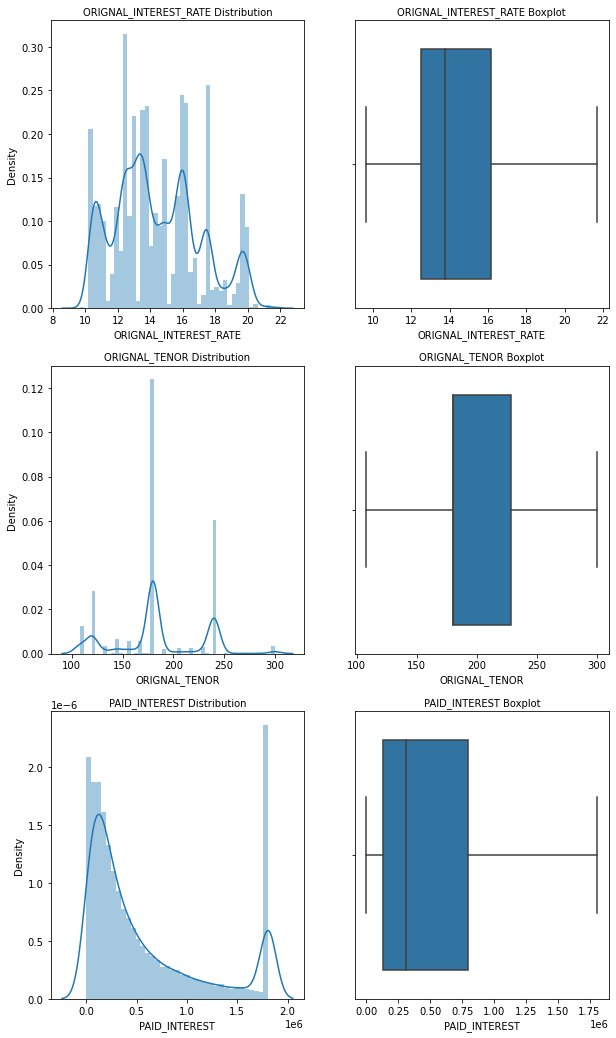

In [38]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)

a = sns.distplot(df_new['ORIGNAL_INTEREST_RATE'] , ax=axes[0][0])
a.set_title("ORIGNAL_INTEREST_RATE Distribution",fontsize=10)

a = sns.boxplot(df_new['ORIGNAL_INTEREST_RATE'] , orient = "v" , ax=axes[0][1])
a.set_title("ORIGNAL_INTEREST_RATE Boxplot",fontsize=10)


a = sns.distplot(df_new['ORIGNAL_TENOR'] , ax=axes[1][0])
a.set_title("ORIGNAL_TENOR Distribution",fontsize=10)

a = sns.boxplot(df_new['ORIGNAL_TENOR'] , orient = "v" , ax=axes[1][1])
a.set_title("ORIGNAL_TENOR Boxplot",fontsize=10)


a = sns.distplot(df_new['PAID_INTEREST'] , ax=axes[2][0])
a.set_title("PAID_INTEREST Distribution",fontsize=10)

a = sns.boxplot(df_new['PAID_INTEREST'] , orient = "v" , ax=axes[2][1])
a.set_title("PAID_INTEREST Boxplot",fontsize=10)

plt.show()

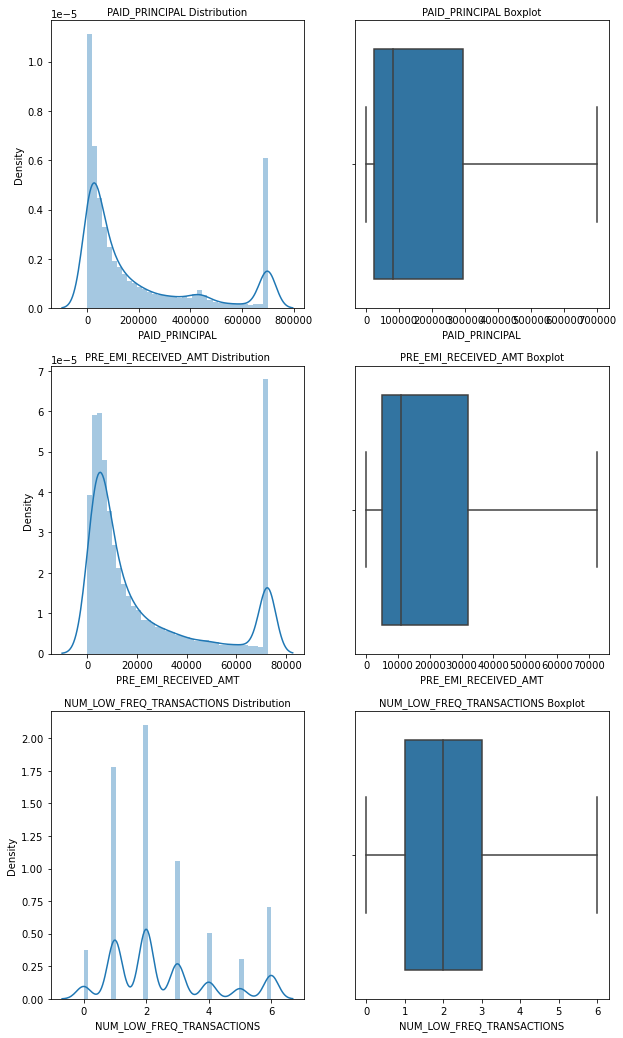

In [39]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)

a = sns.distplot(df_new['PAID_PRINCIPAL'] , ax=axes[0][0])
a.set_title("PAID_PRINCIPAL Distribution",fontsize=10)

a = sns.boxplot(df_new['PAID_PRINCIPAL'] , orient = "v" , ax=axes[0][1])
a.set_title("PAID_PRINCIPAL Boxplot",fontsize=10)


a = sns.distplot(df_new['PRE_EMI_RECEIVED_AMT'] , ax=axes[1][0])
a.set_title("PRE_EMI_RECEIVED_AMT Distribution",fontsize=10)

a = sns.boxplot(df_new['PRE_EMI_RECEIVED_AMT'] , orient = "v" , ax=axes[1][1])
a.set_title("PRE_EMI_RECEIVED_AMT Boxplot",fontsize=10)


a = sns.distplot(df_new['NUM_LOW_FREQ_TRANSACTIONS'] , ax=axes[2][0])
a.set_title("NUM_LOW_FREQ_TRANSACTIONS Distribution",fontsize=10)

a = sns.boxplot(df_new['NUM_LOW_FREQ_TRANSACTIONS'] , orient = "v" , ax=axes[2][1])
a.set_title("NUM_LOW_FREQ_TRANSACTIONS Boxplot",fontsize=10)

plt.show()

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Pair Plot

<Figure size 720x720 with 0 Axes>

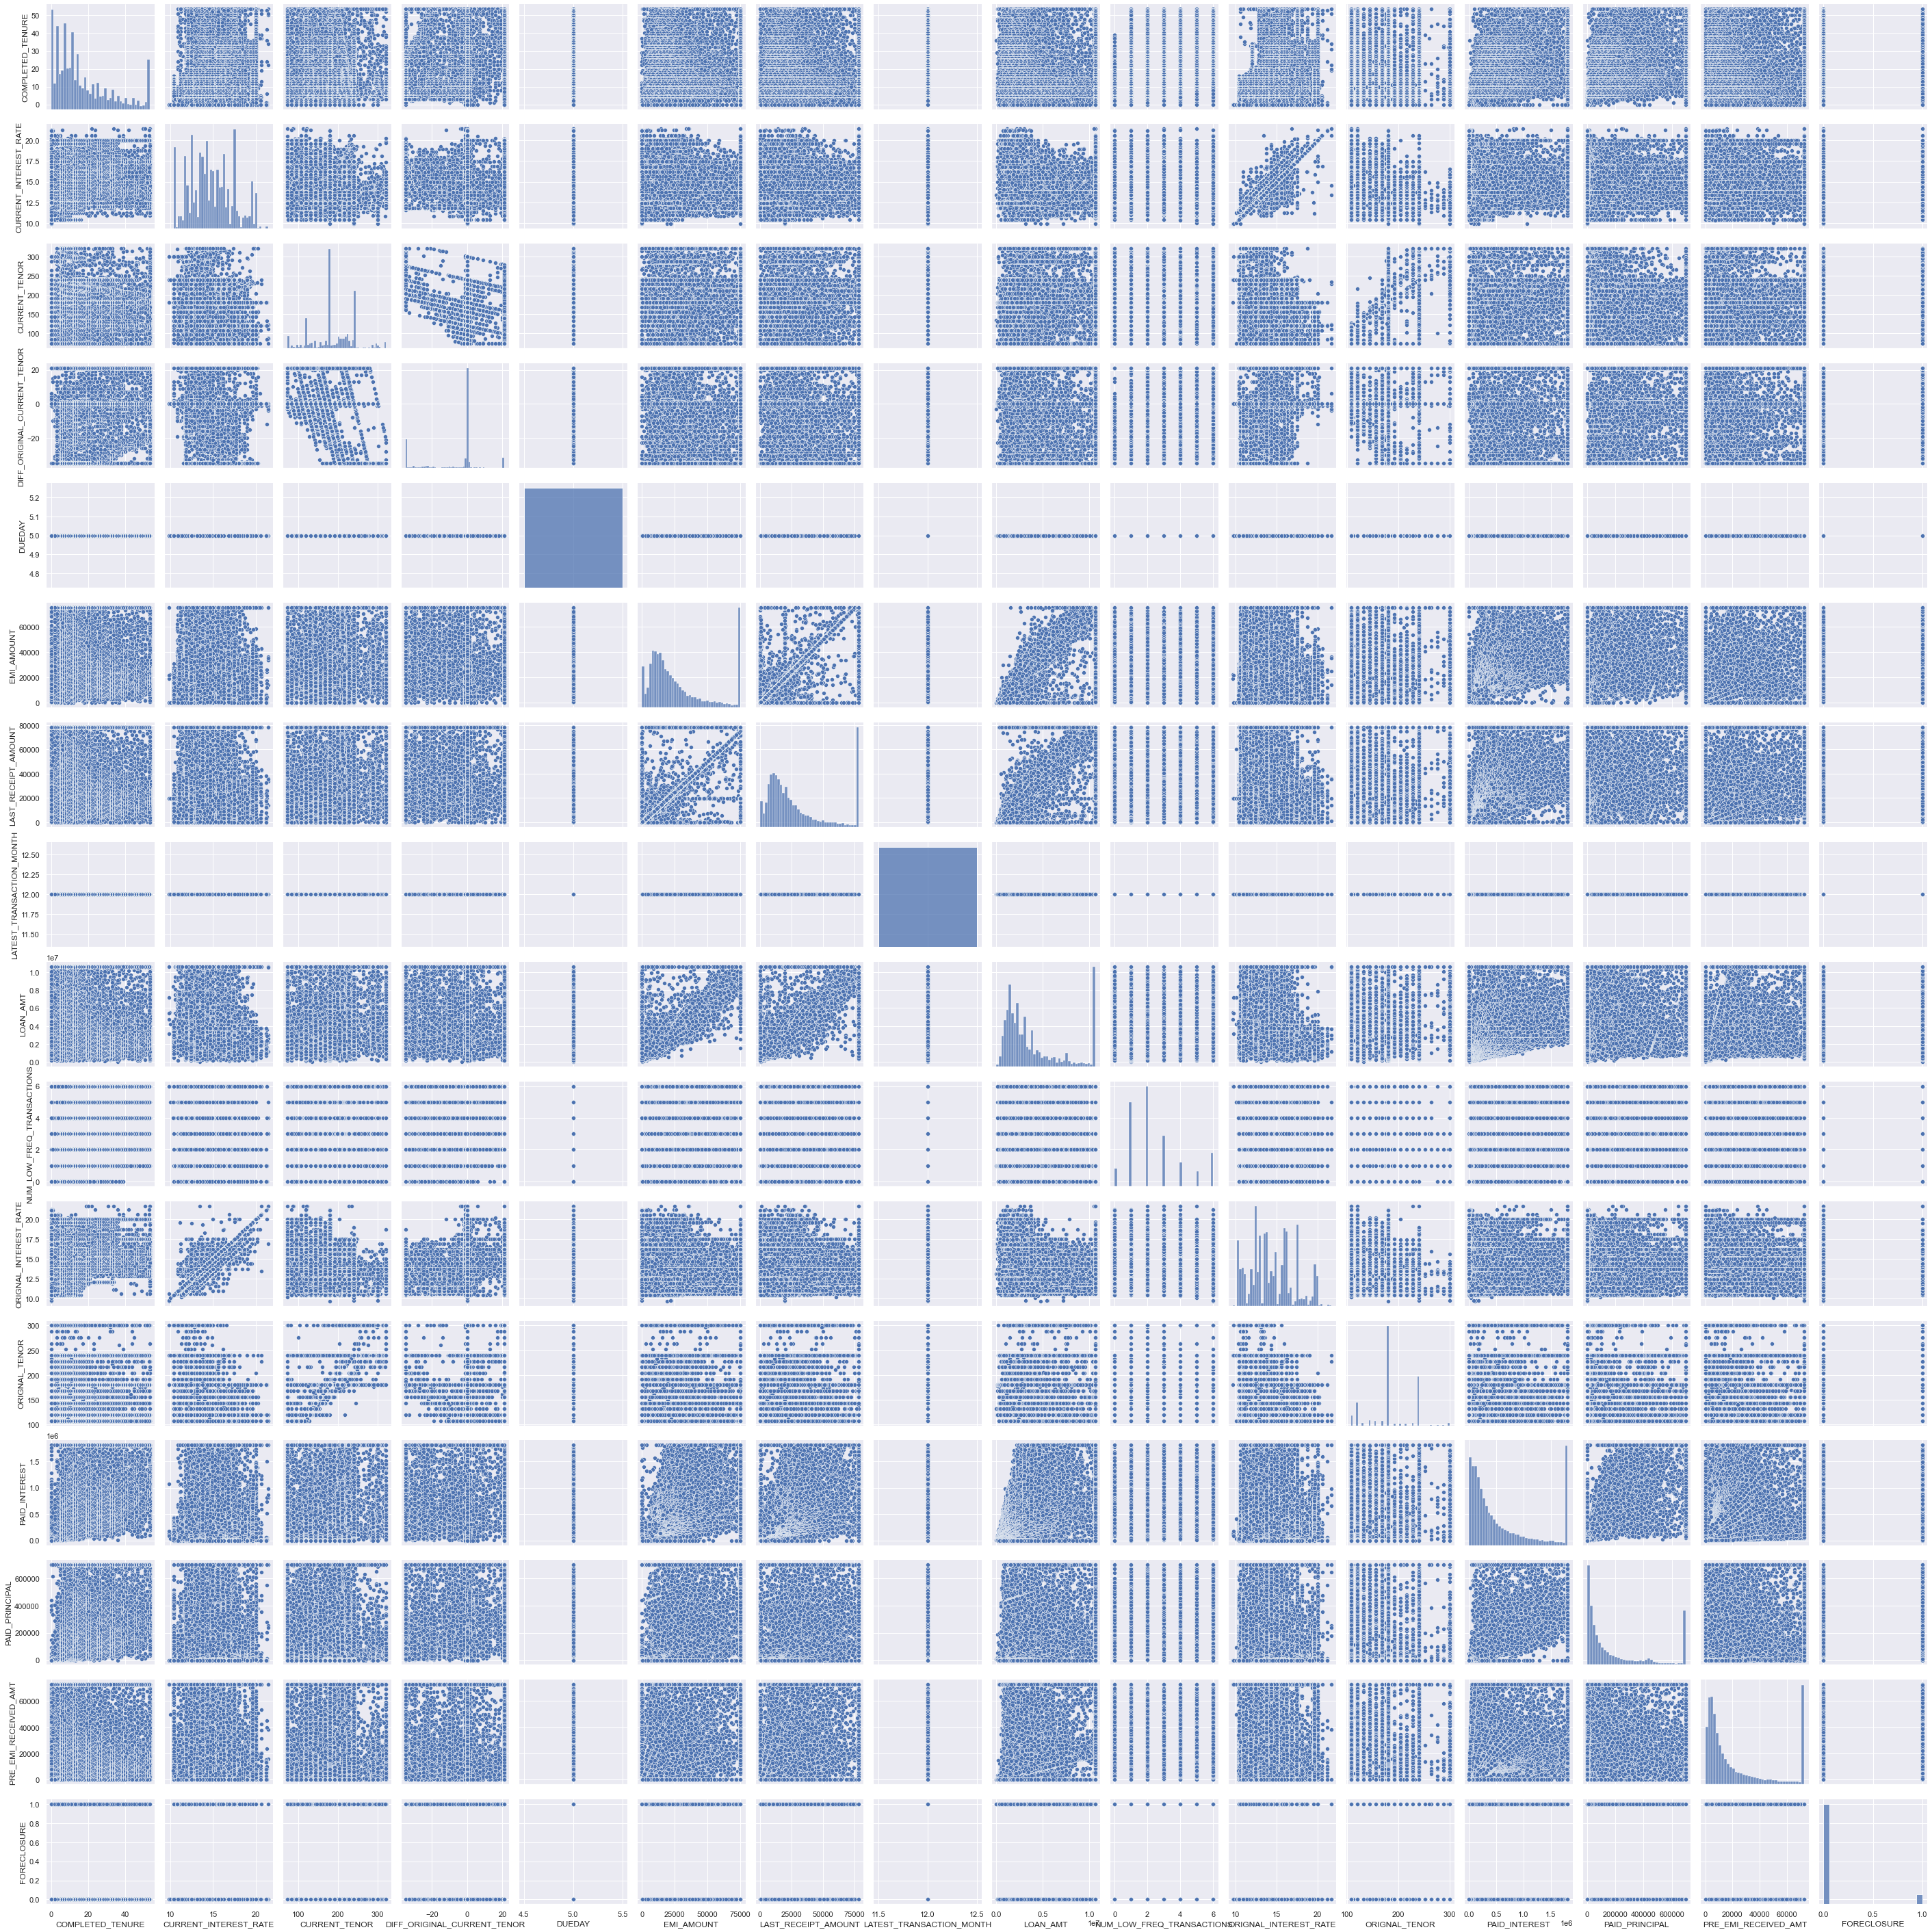

In [40]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.pairplot(df_new)

In [41]:
df_new=df_new.drop('DUEDAY',axis=1)
df_new=df_new.drop('LATEST_TRANSACTION_MONTH',axis=1)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Convert the categorical variable to numeric variable

In [42]:
for feature in df_new.columns: 
    if df_new[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_new[feature].unique()))
        print(pd.Categorical(df_new[feature].unique()).codes)
        df_new[feature] = pd.Categorical(df_new[feature]).codes



feature: PRODUCT
['HL', 'LAP', 'STHL', 'STLAP']
Categories (4, object): ['HL', 'LAP', 'STHL', 'STLAP']
[0 1 2 3]


In [43]:
pd.crosstab(df_new['PRODUCT'],df_new['FORECLOSURE'] )

FORECLOSURE     0    1
PRODUCT               
0            2488  990
1            6155    2
2            6457  803
3            3027    0

<AxesSubplot:xlabel='PRODUCT', ylabel='count'>

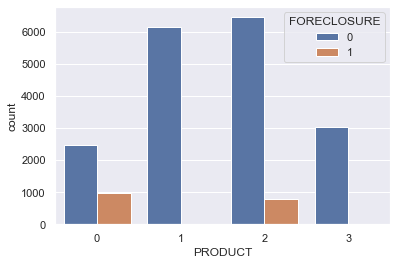

In [44]:
sns.countplot(x="PRODUCT", hue="FORECLOSURE", data=df_new)

<span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>For the products Home loan and Short Term Homeloan there foreclosure is between 0 & 1. The Loan against property and Short-term LAP is not having any foreclosure.

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Scale the data

In [45]:
df_new.head()

COMPLETED_TENURE  CURRENT_INTEREST_RATE  CURRENT_TENOR  \
0              45.0              13.421934           73.0   
1              38.0              13.734072          137.0   
2              53.5              15.606900          312.0   
3              53.5              11.236968           91.0   
4              53.5              14.982624          304.0   

   DIFF_ORIGINAL_CURRENT_TENOR  EMI_AMOUNT  LAST_RECEIPT_AMOUNT      LOAN_AMT  \
0                         21.0     75239.5            78226.375  1.061531e+07   
1                         21.0     75239.5            78226.375  1.061531e+07   
2                        -35.0     22878.0            22878.000  3.933395e+06   
3                         21.0     65741.0            65741.000  1.002259e+07   
4                        -35.0     54433.0            54433.000  7.755937e+06   

   NUM_LOW_FREQ_TRANSACTIONS  ORIGNAL_INTEREST_RATE  ORIGNAL_TENOR  \
0                        1.0              10.612692          120.0   
1                        0.0              10.612692          180.0   
2                        3.0              11.549106          180.0   
3                        6.0              10.612692          180.0   
4                        3.0              10.924830          180.0   

   PAID_INTEREST  PAID_PRINCIPAL  PRE_EMI_RECEIVED_AMT  PRODUCT  FORECLOSURE  
0   1.808782e+06   699415.805501           7994.273589        0            1  
1   1.808782e+06   699415.805501          72650.318040        0            1  
2   1.808782e+06   699415.805501           5947.630536        0            1  
3   1.808782e+06   699415.805501          60322.180776        0            1  
4   1.808782e+06   555284.697909          27732.787464        0            1

In [46]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [47]:
df_new=df_new.drop('DIFF_ORIGINAL_CURRENT_TENOR',axis=1)

In [48]:
df_new['COMPLETED_TENURE'] = std_scale.fit_transform(df_new[['COMPLETED_TENURE']])
df_new['CURRENT_TENOR'] = std_scale.fit_transform(df_new[['CURRENT_TENOR']])
df_new['NUM_LOW_FREQ_TRANSACTIONS'] = std_scale.fit_transform(df_new[['NUM_LOW_FREQ_TRANSACTIONS']])
df_new['ORIGNAL_TENOR'] = std_scale.fit_transform(df_new[['ORIGNAL_TENOR']])

In [49]:
df_new.head()

COMPLETED_TENURE  CURRENT_INTEREST_RATE  CURRENT_TENOR  EMI_AMOUNT  \
0          1.907940              13.421934      -2.199854     75239.5   
1          1.434676              13.734072      -0.992209     75239.5   
2          2.482618              15.606900       2.309943     22878.0   
3          2.482618              11.236968      -1.860204     65741.0   
4          2.482618              14.982624       2.158987     54433.0   

   LAST_RECEIPT_AMOUNT      LOAN_AMT  NUM_LOW_FREQ_TRANSACTIONS  \
0            78226.375  1.061531e+07                  -0.892527   
1            78226.375  1.061531e+07                  -1.494292   
2            22878.000  3.933395e+06                   0.311001   
3            65741.000  1.002259e+07                   2.116294   
4            54433.000  7.755937e+06                   0.311001   

   ORIGNAL_INTEREST_RATE  ORIGNAL_TENOR  PAID_INTEREST  PAID_PRINCIPAL  \
0              10.612692      -1.528052   1.808782e+06   699415.805501   
1              10.612692      -0.105598   1.808782e+06   699415.805501   
2              11.549106      -0.105598   1.808782e+06   699415.805501   
3              10.612692      -0.105598   1.808782e+06   699415.805501   
4              10.924830      -0.105598   1.808782e+06   555284.697909   

   PRE_EMI_RECEIVED_AMT  PRODUCT  FORECLOSURE  
0           7994.273589        0            1  
1          72650.318040        0            1  
2           5947.630536        0            1  
3          60322.180776        0            1  
4          27732.787464        0            1

<B/><span style="font-family:Bookman Old Style; font-size:1.2em;"><font color="Blue"/>MODELLING TECHNIQUES

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Proportion of 0s and 1s

In [50]:
df_new.FORECLOSURE.value_counts(normalize=True)

0    0.909899
1    0.090101
Name: FORECLOSURE, dtype: float64

In [51]:
df_new.FORECLOSURE.value_counts()

0    18127
1     1795
Name: FORECLOSURE, dtype: int64

<AxesSubplot:xlabel='FORECLOSURE', ylabel='count'>

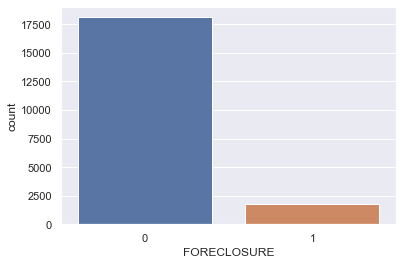

In [52]:
sns.countplot(x="FORECLOSURE", data=df_new)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Modelling technique on Product specified HL and STHL

In [53]:
df_new.drop(df_new[df_new['PRODUCT'] ==1].index, inplace = True)
df_new.drop(df_new[df_new['PRODUCT'] ==3].index, inplace = True)
df_new.shape

(10738, 14)

In [54]:
# Copy all the predictor variables into X dataframe
X = df_new.drop('FORECLOSURE', axis=1)
# Copy target into the y dataframe.  
y = df_new['FORECLOSURE']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="purple"/>Train Dataset

In [58]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.798962213943587
[[5502  768]
 [ 743  503]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6270
           1       0.40      0.40      0.40      1246

    accuracy                           0.80      7516
   macro avg       0.64      0.64      0.64      7516
weighted avg       0.80      0.80      0.80      7516



In [59]:
NB_metrics=classification_report(y_train, y_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_precision=round(df.loc["1"][1],2)
NB_train_recall=round(df.loc["1"][2],2)
NB_train_f1=round(df.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.4
NB_train_recall  0.4
NB_train_f1  0.4


AUC: 0.745


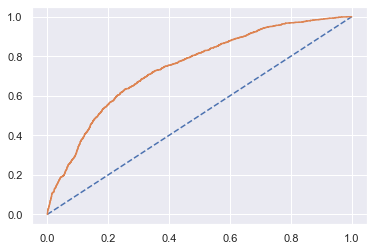

In [60]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="purple"/>Test Dataset

In [61]:
y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8072625698324022
[[2381  294]
 [ 327  220]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2675
           1       0.43      0.40      0.41       547

    accuracy                           0.81      3222
   macro avg       0.65      0.65      0.65      3222
weighted avg       0.80      0.81      0.80      3222



In [62]:
NB_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_precision=round(df.loc["1"][1],2)
NB_test_recall=round(df.loc["1"][2],2)
NB_test_f1=round(df.loc["1"][0],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.4
NB_test_recall  0.41
NB_test_f1  0.43


AUC: 0.743


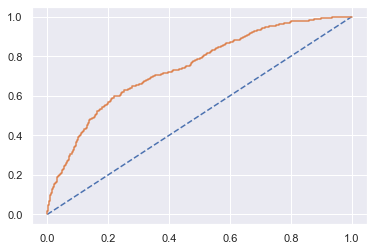

In [63]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="purple"/>Train Dataset

In [66]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.7916444917509313
[[5728  542]
 [1024  222]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6270
           1       0.29      0.18      0.22      1246

    accuracy                           0.79      7516
   macro avg       0.57      0.55      0.55      7516
weighted avg       0.76      0.79      0.77      7516



In [67]:
LR_metrics=classification_report(y_train, y_predict,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_train_precision=round(df.loc["1"][1],2)
LR_train_recall=round(df.loc["1"][2],2)
LR_train_f1=round(df.loc["1"][0],2)
print ('LR_train_precision ',LR_train_precision)
print ('LR_train_recall ',LR_train_recall)
print ('LR_train_f1 ',LR_train_f1)

LR_train_precision  0.18
LR_train_recall  0.22
LR_train_f1  0.29


AUC: 0.553


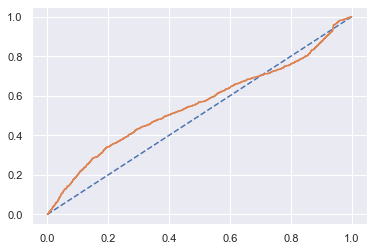

In [68]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="purple"/>Test Datset

In [70]:
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.792675356921167
[[2468  207]
 [ 461   86]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2675
           1       0.29      0.16      0.20       547

    accuracy                           0.79      3222
   macro avg       0.57      0.54      0.54      3222
weighted avg       0.75      0.79      0.77      3222



In [71]:
LR_metrics=classification_report(y_test, y_predict,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_test_precision=round(df.loc["1"][1],2)
LR_test_recall=round(df.loc["1"][2],2)
LR_test_f1=round(df.loc["1"][0],2)
print ('LR_test_precision ',LR_test_precision)
print ('LR_test_recall ',LR_test_recall)
print ('LR_test_f1 ',LR_test_f1)

LR_test_precision  0.16
LR_test_recall  0.2
LR_test_f1  0.29


AUC: 0.547


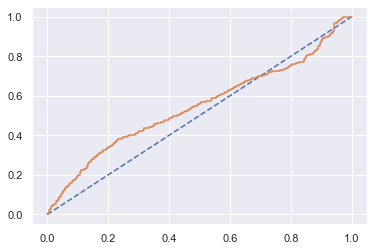

In [72]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Decision Tree

In [73]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="purple"/>Test Dataset

In [74]:
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8674736188702669
[[2433  242]
 [ 185  362]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2675
           1       0.60      0.66      0.63       547

    accuracy                           0.87      3222
   macro avg       0.76      0.79      0.77      3222
weighted avg       0.87      0.87      0.87      3222



In [75]:
DT_metrics=classification_report(y_test, y_predict,output_dict=True)
df=pd.DataFrame(DT_metrics).transpose()
DT_test_precision=round(df.loc["1"][1],2)
DT_test_recall=round(df.loc["1"][2],2)
DT_test_f1=round(df.loc["1"][0],2)
print ('DT_test_precision ',DT_test_precision)
print ('DT_test_recall ',DT_test_recall)
print ('DT_test_f1 ',DT_test_f1)

DT_test_precision  0.66
DT_test_recall  0.63
DT_test_f1  0.6


AUC: 0.786


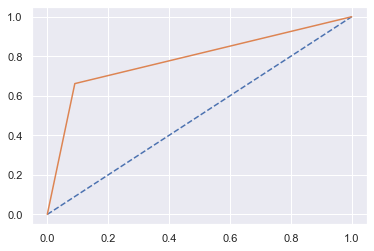

In [76]:
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="purple"/>Train Datset

In [77]:
y_predict = clf.predict(X_train)
model_score = clf.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

1.0
[[6270    0]
 [   0 1246]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6270
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7516
   macro avg       1.00      1.00      1.00      7516
weighted avg       1.00      1.00      1.00      7516



In [78]:
DT_metrics=classification_report(y_train, y_predict,output_dict=True)
df=pd.DataFrame(DT_metrics).transpose()
DT_train_precision=round(df.loc["1"][1],2)
DT_train_recall=round(df.loc["1"][2],2)
DT_train_f1=round(df.loc["1"][0],2)
print ('DT_train_precision ',DT_train_precision)
print ('DT_train_recall ',DT_train_recall)
print ('DT_train_f1 ',DT_train_f1)

DT_train_precision  1.0
DT_train_recall  1.0
DT_train_f1  1.0


AUC: 1.000


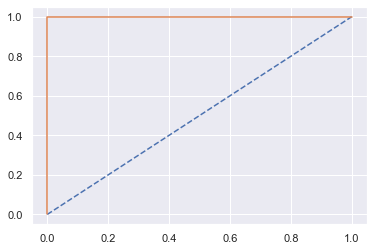

In [79]:
# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
clfKNN=KNeighborsClassifier()
clfKNN.fit(X_train,y_train)
y_pred=clfKNN.predict(X_train)
model_scoreKNN = clfKNN.score(X_train, y_train)
print(model_scoreKNN)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

0.8774614156466205
[[6049  221]
 [ 700  546]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6270
           1       0.71      0.44      0.54      1246

    accuracy                           0.88      7516
   macro avg       0.80      0.70      0.74      7516
weighted avg       0.87      0.88      0.87      7516



In [81]:
KNN_metrics=classification_report(y_train, y_pred,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_precision=round(df.loc["1"][1],2)
KNN_train_recall=round(df.loc["1"][2],2)
KNN_train_f1=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.44
KNN_train_recall  0.54
KNN_train_f1  0.71


AUC: 0.913


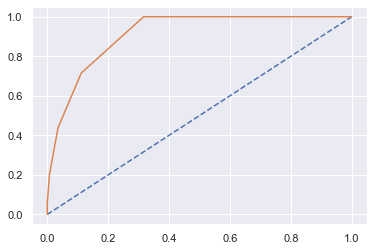

In [82]:
# predict probabilities
probs = clfKNN.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="purple"/>Test Datset

In [83]:
y_pred=clfKNN.predict(X_test)
model_scoreKNN = clfKNN.score(X_test, y_test)
print(model_scoreKNN)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.834885164494103
[[2511  164]
 [ 368  179]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2675
           1       0.52      0.33      0.40       547

    accuracy                           0.83      3222
   macro avg       0.70      0.63      0.65      3222
weighted avg       0.81      0.83      0.82      3222



In [84]:
KNN_metrics=classification_report(y_test, y_pred,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(df.loc["1"][1],2)
KNN_test_recall=round(df.loc["1"][2],2)
KNN_test_f1=round(df.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.33
KNN_test_recall  0.4
KNN_test_f1  0.52


AUC: 0.751


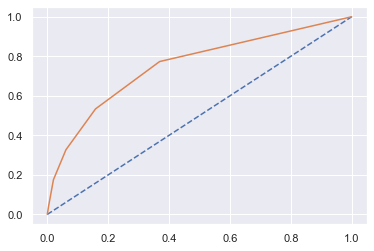

In [85]:
# predict probabilities
probs = clfKNN.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>SVM

In [86]:
from sklearn import svm
clfSVM = svm.SVC()
clfSVM.fit(X_train, y_train)
y_pred=clfSVM.predict(X_train)
model_scoreSVM = clfSVM.score(X_train, y_train)
print(model_scoreSVM)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

0.8392762107503992
[[6092  178]
 [1030  216]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      6270
           1       0.55      0.17      0.26      1246

    accuracy                           0.84      7516
   macro avg       0.70      0.57      0.59      7516
weighted avg       0.80      0.84      0.80      7516



In [87]:
SVM_metrics=classification_report(y_train, y_pred,output_dict=True)
df=pd.DataFrame(SVM_metrics).transpose()
SVM_train_precision=round(df.loc["1"][1],2)
SVM_train_recall=round(df.loc["1"][2],2)
SVM_train_f1=round(df.loc["1"][0],2)
print ('SVM_train_precision ',SVM_train_precision)
print ('SVM_train_recall ',SVM_train_recall)
print ('SVM_train_f1 ',SVM_train_f1)

SVM_train_precision  0.17
SVM_train_recall  0.26
SVM_train_f1  0.55


In [88]:
y_pred=clfSVM.predict(X_test)
model_scoreSVM = clfSVM.score(X_test, y_test)
print(model_scoreSVM)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8367473618870267
[[2603   72]
 [ 454   93]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2675
           1       0.56      0.17      0.26       547

    accuracy                           0.84      3222
   macro avg       0.71      0.57      0.58      3222
weighted avg       0.80      0.84      0.80      3222



In [89]:
clfSVM = svm.SVC()
clfSVM.fit(X_test, y_test)
y_pred_test=clfSVM.predict(X_test)
SVM_metrics=classification_report(y_test, y_pred_test,output_dict=True)
df=pd.DataFrame(SVM_metrics).transpose()
SVM_test_precision=round(df.loc["1"][1],2)
SVM_test_recall=round(df.loc["1"][2],2)
SVM_test_f1=round(df.loc["1"][0],2)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_precision  0.18
SVM_test_recall  0.27
SVM_test_f1  0.55


<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Linear Discriminant Analysis

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8497871208089409
[[5932  338]
 [ 791  455]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6270
           1       0.57      0.37      0.45      1246

    accuracy                           0.85      7516
   macro avg       0.73      0.66      0.68      7516
weighted avg       0.83      0.85      0.84      7516



In [108]:
LDA_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][1],2)
LDA_train_recall=round(df.loc["1"][2],2)
LDA_train_f1=round(df.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.37
LDA_train_recall  0.45
LDA_train_f1  0.57


AUC: 0.861


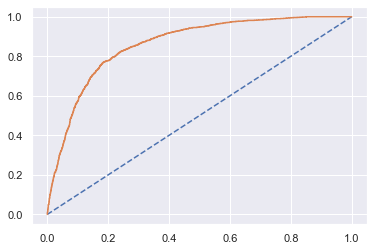

In [92]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="purple"/>Test Dataset

In [93]:
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8541278708876474
[[2544  131]
 [ 339  208]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2675
           1       0.61      0.38      0.47       547

    accuracy                           0.85      3222
   macro avg       0.75      0.67      0.69      3222
weighted avg       0.84      0.85      0.84      3222



In [94]:
LDA_metrics = classification_report( y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][1],2)
LDA_test_recall=round(df.loc["1"][2],2)
LDA_test_f1=round(df.loc["1"][0],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.38
LDA_test_recall  0.47
LDA_test_f1  0.61


AUC: 0.858


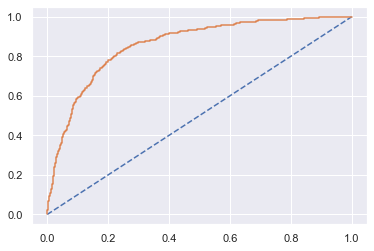

In [95]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Boosting

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train,y_train)
y_pred=clfADB.predict(X_train)
model_scoreADB = clfADB.score(X_train, y_train)
print(model_scoreADB)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

0.9168440659925492
[[6105  165]
 [ 460  786]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6270
           1       0.83      0.63      0.72      1246

    accuracy                           0.92      7516
   macro avg       0.88      0.80      0.83      7516
weighted avg       0.91      0.92      0.91      7516



In [98]:
ClfADB_metrics=classification_report(y_train, y_pred,output_dict=True)
df=pd.DataFrame(ClfADB_metrics).transpose()
ClfADB_train_precision=round(df.loc["1"][1],2)
ClfADB_train_recall=round(df.loc["1"][2],2)
ClfADB_train_f1=round(df.loc["1"][0],2)
print ('ClfADB_train_precision ',ClfADB_train_precision)
print ('ClfADB_train_recall ',ClfADB_train_recall)
print ('ClfADB_train_f1 ',ClfADB_train_f1)

ClfADB_train_precision  0.63
ClfADB_train_recall  0.72
ClfADB_train_f1  0.83


AUC: 0.939


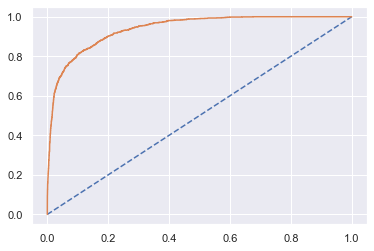

In [99]:
# predict probabilities
probs = clfADB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Purple"/>Test Dataset

In [100]:
y_pred=clfADB.predict(X_test)
model_scoreADB = clfADB.score(X_test, y_test)
print(model_scoreADB)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9115456238361266
[[2605   70]
 [ 215  332]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2675
           1       0.83      0.61      0.70       547

    accuracy                           0.91      3222
   macro avg       0.87      0.79      0.82      3222
weighted avg       0.91      0.91      0.91      3222



In [101]:
ClfADB_metrics=classification_report(y_test, y_pred,output_dict=True)
df=pd.DataFrame(ClfADB_metrics).transpose()
ClfADB_test_precision=round(df.loc["1"][1],2)
ClfADB_test_recall=round(df.loc["1"][2],2)
ClfADB_test_f1=round(df.loc["1"][0],2)
print ('ClfADB_test_precision ',ClfADB_test_precision)
print ('ClfADB_test_recall ',ClfADB_test_recall)
print ('ClfADB_test_f1 ',ClfADB_test_f1)

ClfADB_test_precision  0.61
ClfADB_test_recall  0.7
ClfADB_test_f1  0.83


AUC: 0.930


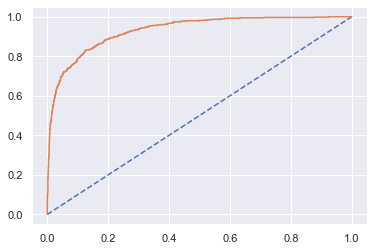

In [102]:
# predict probabilities
probs = clfADB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>XGBoost

In [103]:
import xgboost as xgb
clfXGB=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
clfXGB.fit(X_train, y_train)
y_pred=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

[16:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9245609366684406
[[6109  161]
 [ 406  840]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6270
           1       0.84      0.67      0.75      1246

    accuracy                           0.92      7516
   macro avg       0.89      0.82      0.85      7516
weighted avg       0.92      0.92      0.92      7516



AUC: 0.948


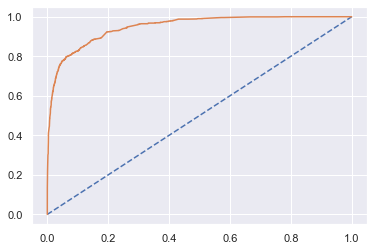

In [104]:
# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [105]:
clfXGB_Test=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
clfXGB_Test.fit(X_test, y_test)
y_pred_test=clfXGB_Test.predict(X_test)
model_scoreXGB=clfXGB_Test.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))

[16:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9267535692116697
[[2603   72]
 [ 164  383]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2675
           1       0.84      0.70      0.76       547

    accuracy                           0.93      3222
   macro avg       0.89      0.84      0.86      3222
weighted avg       0.92      0.93      0.92      3222



AUC: 0.947


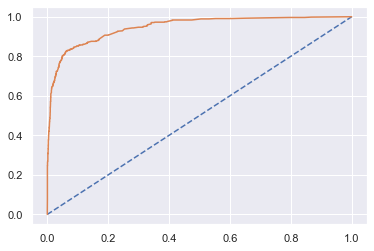

In [106]:
# predict probabilities
probs = clfXGB_Test.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Green"/>Comparison of all the models

In [109]:
index=['Recall','Precision','F1 Score']
data = pd.DataFrame({'NB Train':[NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[NB_test_recall,NB_test_precision,NB_test_f1],
        'Logistic Regression Train':[LR_train_recall,LR_train_precision,LR_train_f1],
        'Logistic Regression Test':[LR_test_recall,LR_test_precision,LR_test_f1],
        'Decision Tree Train':[DT_train_recall,DT_train_precision,DT_train_f1],
        'Decision Tree Test':[DT_test_recall,DT_test_precision,DT_test_f1],
        'KNN Train':[KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_test_recall,KNN_test_precision,KNN_test_f1],
        'SVM Train':[SVM_train_recall,SVM_train_precision,SVM_train_f1],
        'SVM Test':[SVM_test_recall,SVM_test_precision,SVM_test_f1],
        'LDA Train':[LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_recall,LDA_test_precision,LDA_test_f1],
        'Ada Booster Train':[ClfADB_train_recall,ClfADB_train_precision,ClfADB_train_f1],
        'Ada Booster Test':[ClfADB_test_recall,ClfADB_test_precision,ClfADB_test_f1]},index=index)
round(data,2)

NB Train  NB Test  Logistic Regression Train  \
Recall          0.4     0.41                       0.22   
Precision       0.4     0.40                       0.18   
F1 Score        0.4     0.43                       0.29   

           Logistic Regression Test  Decision Tree Train  Decision Tree Test  \
Recall                         0.20                  1.0                0.63   
Precision                      0.16                  1.0                0.66   
F1 Score                       0.29                  1.0                0.60   

           KNN Train  KNN Test  SVM Train  SVM Test  LDA Train  LDA Test  \
Recall          0.54      0.40       0.26      0.27       0.45      0.47   
Precision       0.44      0.33       0.17      0.18       0.37      0.38   
F1 Score        0.71      0.52       0.55      0.55       0.57      0.61   

           Ada Booster Train  Ada Booster Test  
Recall                  0.72              0.70  
Precision               0.63              0.61  
F1 Score                0.83              0.83

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Cross Validation

In [110]:
from sklearn.model_selection import cross_val_score
clfXGB = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
scores = cross_val_score(clfXGB, X_train, y_train, cv=10)
scores

[16:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.91356383, 0.91356383, 0.92154255, 0.89361702, 0.90425532,
       0.90159574, 0.92809587, 0.90412783, 0.91211718, 0.91877497])

In [111]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using clfXGB:',scores)
print("Variance of clfXGB accuracies:",scores.var())

Accuracy: Final mean:91.113%, Final standard deviation:(0.981%)
Accuracies from each of the 5 folds using clfXGB: [0.91356383 0.91356383 0.92154255 0.89361702 0.90425532 0.90159574
 0.92809587 0.90412783 0.91211718 0.91877497]
Variance of clfXGB accuracies: 9.614270376111286e-05


<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>SMOTE

In [112]:
from imblearn.over_sampling import SMOTE

In [113]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [114]:
X_train_res.shape

(12540, 13)

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Naive Bayes with SMOTE

In [115]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [116]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [117]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.6621212121212121
[[5213 1057]
 [3180 3090]]
              precision    recall  f1-score   support

           0       0.62      0.83      0.71      6270
           1       0.75      0.49      0.59      6270

    accuracy                           0.66     12540
   macro avg       0.68      0.66      0.65     12540
weighted avg       0.68      0.66      0.65     12540



In [119]:
NB_SM_model=classification_report(y_train_res, y_train_predict,output_dict=True)
df=pd.DataFrame(NB_SM_model).transpose()
NB_SM_model_train_precision=round(df.loc["1"][1],2)
NB_SM_model_train_recall=round(df.loc["1"][2],2)
NB_SM_model_train_f1=round(df.loc["1"][0],2)
print ('NB_SM_model_train_precision ',NB_SM_model_train_precision)
print ('NB_SM_model_train_recall ',NB_SM_model_train_recall)
print ('NB_SM_model_train_f1 ',NB_SM_model_train_f1)

NB_SM_model_train_precision  0.49
NB_SM_model_train_recall  0.59
NB_SM_model_train_f1  0.75


In [118]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7830540037243948
[[2245  430]
 [ 269  278]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      2675
           1       0.39      0.51      0.44       547

    accuracy                           0.78      3222
   macro avg       0.64      0.67      0.65      3222
weighted avg       0.81      0.78      0.79      3222



In [120]:
NB_SM_model=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(NB_SM_model).transpose()
NB_SM_model_test_precision=round(df.loc["1"][1],2)
NB_SM_model_test_recall=round(df.loc["1"][2],2)
NB_SM_model_test_f1=round(df.loc["1"][0],2)
print ('NB_SM_model_test_precision ',NB_SM_model_test_precision)
print ('NB_SM_model_test_recall ',NB_SM_model_test_recall)
print ('NB_SM_model_test_f1 ',NB_SM_model_test_f1)

NB_SM_model_test_precision  0.51
NB_SM_model_test_recall  0.44
NB_SM_model_test_f1  0.39


<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>XGBoost with SMOTE

In [121]:
import xgboost as xgb
XGB_SM_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_SM_model.fit(X_train_res, y_train_res)

[16:15:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
## Performance Matrix on train data set
y_train_predict = XGB_SM_model.predict(X_train_res)
model_score = XGB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.917384370015949
[[5679  591]
 [ 445 5825]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6270
           1       0.91      0.93      0.92      6270

    accuracy                           0.92     12540
   macro avg       0.92      0.92      0.92     12540
weighted avg       0.92      0.92      0.92     12540



In [124]:
XGB_SM_model=classification_report(y_train_res, y_train_predict,output_dict=True)
df=pd.DataFrame(XGB_SM_model).transpose()
XGB_SM_model_train_precision=round(df.loc["1"][1],2)
XGB_SM_model_train_recall=round(df.loc["1"][2],2)
XGB_SM_model_train_f1=round(df.loc["1"][0],2)
print ('XGB_SM_model_train_precision ',XGB_SM_model_train_precision)
print ('XGB_SM_model_train_recall ',XGB_SM_model_train_recall)
print ('XGB_SM_model_train_f1 ',XGB_SM_model_train_f1)

XGB_SM_model_train_precision  0.93
XGB_SM_model_train_recall  0.92
XGB_SM_model_train_f1  0.91


In [123]:
## Performance Matrix on test data set
y_test_predict = XGB_SM_model.predict(X_test)
model_score = XGB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8693358162631906
[[2377  298]
 [ 123  424]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2675
           1       0.59      0.78      0.67       547

    accuracy                           0.87      3222
   macro avg       0.77      0.83      0.79      3222
weighted avg       0.89      0.87      0.88      3222



In [125]:
XGB_SM_model=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(XGB_SM_model).transpose()
XGB_SM_model_test_precision=round(df.loc["1"][1],2)
XGB_SM_model_test_recall=round(df.loc["1"][2],2)
XGB_SM_model_test_f1=round(df.loc["1"][0],2)
print ('XGB_SM_model_test_precision ',XGB_SM_model_test_precision)
print ('XGB_SM_model_test_recall ',XGB_SM_model_test_recall)
print ('XGB_SM_model_test_f1 ',XGB_SM_model_test_f1)

XGB_SM_model_test_precision  0.78
XGB_SM_model_test_recall  0.67
XGB_SM_model_test_f1  0.59


<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>KNN With SMOTE

In [126]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [127]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8929824561403509
[[5147 1123]
 [ 219 6051]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      6270
           1       0.84      0.97      0.90      6270

    accuracy                           0.89     12540
   macro avg       0.90      0.89      0.89     12540
weighted avg       0.90      0.89      0.89     12540



In [129]:
KNN_SM_model=classification_report(y_train_res, y_train_predict,output_dict=True)
df=pd.DataFrame(KNN_SM_model).transpose()
KNN_SM_model_train_precision=round(df.loc["1"][1],2)
KNN_SM_model_train_recall=round(df.loc["1"][2],2)
KNN_SM_model_train_f1=round(df.loc["1"][0],2)
print ('KNN_SM_model_train_precision ',KNN_SM_model_train_precision)
print ('KNN_SM_model_train_recall ',KNN_SM_model_train_recall)
print ('KNN_SM_model_train_f1 ',KNN_SM_model_train_f1)

KNN_SM_model_train_precision  0.97
KNN_SM_model_train_recall  0.9
KNN_SM_model_train_f1  0.84


In [128]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7312228429546865
[[2006  669]
 [ 197  350]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2675
           1       0.34      0.64      0.45       547

    accuracy                           0.73      3222
   macro avg       0.63      0.69      0.63      3222
weighted avg       0.81      0.73      0.76      3222



In [130]:
KNN_SM_model=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(KNN_SM_model).transpose()
KNN_SM_model_test_precision=round(df.loc["1"][1],2)
KNN_SM_model_test_recall=round(df.loc["1"][2],2)
KNN_SM_model_test_f1=round(df.loc["1"][0],2)
print ('KNN_SM_model_test_precision ',KNN_SM_model_test_precision)
print ('KNN_SM_model_test_recall ',KNN_SM_model_test_recall)
print ('KNN_SM_model_test_f1 ',KNN_SM_model_test_f1)

KNN_SM_model_test_precision  0.64
KNN_SM_model_test_recall  0.45
KNN_SM_model_test_f1  0.34


<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>SVM With SMOTE

In [131]:
from sklearn import svm

SVM_SM_model= svm.SVC(random_state=1)
SVM_SM_model.fit(X_train_res, y_train_res)

SVC(random_state=1)

In [132]:
## Performance Matrix on train data set
y_train_predict = SVM_SM_model.predict(X_train_res)
model_score = SVM_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.7213716108452951
[[4759 1511]
 [1983 4287]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      6270
           1       0.74      0.68      0.71      6270

    accuracy                           0.72     12540
   macro avg       0.72      0.72      0.72     12540
weighted avg       0.72      0.72      0.72     12540



In [134]:
SVM_SM_model=classification_report(y_train_res, y_train_predict,output_dict=True)
df=pd.DataFrame(SVM_SM_model).transpose()
SVM_SM_model_train_precision=round(df.loc["1"][1],2)
SVM_SM_model_train_recall=round(df.loc["1"][2],2)
SVM_SM_model_train_f1=round(df.loc["1"][0],2)
print ('SVM_SM_model_train_precision ',SVM_SM_model_train_precision)
print ('SVM_SM_model_train_recall ',SVM_SM_model_train_recall)
print ('SVM_SM_model_train_f1 ',SVM_SM_model_train_f1)

SVM_SM_model_train_precision  0.68
SVM_SM_model_train_recall  0.71
SVM_SM_model_train_f1  0.74


In [133]:
## Performance Matrix on test data set
y_test_predict = SVM_SM_model.predict(X_test)
model_score = SVM_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7417752948479206
[[2030  645]
 [ 187  360]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2675
           1       0.36      0.66      0.46       547

    accuracy                           0.74      3222
   macro avg       0.64      0.71      0.65      3222
weighted avg       0.82      0.74      0.77      3222



In [135]:
SVM_SM_model=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(SVM_SM_model).transpose()
SVM_SM_model_test_precision=round(df.loc["1"][1],2)
SVM_SM_model_test_recall=round(df.loc["1"][2],2)
SVM_SM_model_test_f1=round(df.loc["1"][0],2)
print ('SVM_SM_model_test_precision ',SVM_SM_model_test_precision)
print ('SVM_SM_model_test_recall ',SVM_SM_model_test_recall)
print ('SVM_SM_model_test_f1 ',SVM_SM_model_test_f1)

SVM_SM_model_test_precision  0.66
SVM_SM_model_test_recall  0.46
SVM_SM_model_test_f1  0.36


<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>LDA With SMOTE

In [136]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_SM_model= LinearDiscriminantAnalysis()
LDA_SM_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [137]:
y_train_predict = LDA_SM_model.predict(X_train_res)
model_score = LDA_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8250398724082935
[[4977 1293]
 [ 901 5369]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      6270
           1       0.81      0.86      0.83      6270

    accuracy                           0.83     12540
   macro avg       0.83      0.83      0.82     12540
weighted avg       0.83      0.83      0.82     12540



In [139]:
LDA_SM_model=classification_report(y_train_res, y_train_predict,output_dict=True)
df=pd.DataFrame(LDA_SM_model).transpose()
LDA_SM_model_train_precision=round(df.loc["1"][1],2)
LDA_SM_model_train_recall=round(df.loc["1"][2],2)
LDA_SM_model_train_f1=round(df.loc["1"][0],2)
print ('LDA_SM_model_train_precision ',LDA_SM_model_train_precision)
print ('LDA_SM_model_train_recall ',LDA_SM_model_train_recall)
print ('LDA_SM_model_train_f1 ',LDA_SM_model_train_f1)

LDA_SM_model_train_precision  0.86
LDA_SM_model_train_recall  0.83
LDA_SM_model_train_f1  0.81


In [138]:
## Performance Matrix on test data set
y_test_predict = LDA_SM_model.predict(X_test)
model_score = LDA_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7985723153320918
[[2135  540]
 [ 109  438]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      2675
           1       0.45      0.80      0.57       547

    accuracy                           0.80      3222
   macro avg       0.70      0.80      0.72      3222
weighted avg       0.87      0.80      0.82      3222



In [140]:
LDA_SM_model=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(LDA_SM_model).transpose()
LDA_SM_model_test_precision=round(df.loc["1"][1],2)
LDA_SM_model_test_recall=round(df.loc["1"][2],2)
LDA_SM_model_test_f1=round(df.loc["1"][0],2)
print ('LDA_SM_model_test_precision ',LDA_SM_model_test_precision)
print ('LDA_SM_model_test_recall ',LDA_SM_model_test_recall)
print ('LDA_SM_model_test_f1 ',LDA_SM_model_test_f1)

LDA_SM_model_test_precision  0.8
LDA_SM_model_test_recall  0.57
LDA_SM_model_test_f1  0.45


<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Comparison of all the models

In [142]:
index=['Recall','Precision','F1 Score']
data = pd.DataFrame({'NB_SM_Train':[NB_SM_model_train_recall,NB_SM_model_train_precision,NB_SM_model_train_f1],
        'NB_SM_Test':[NB_SM_model_test_recall,NB_SM_model_test_precision,NB_SM_model_test_f1],
        'KNN_SM_Train':[KNN_SM_model_train_recall,KNN_SM_model_train_precision,KNN_SM_model_train_f1],
        'KNN_SM_Test':[KNN_SM_model_test_recall,KNN_SM_model_test_precision,KNN_SM_model_test_f1],
        'SVM_SM_Train':[SVM_SM_model_train_recall,SVM_SM_model_train_precision,SVM_SM_model_train_f1],
        'SVM_SM_Test':[SVM_SM_model_test_recall,SVM_SM_model_test_precision,SVM_SM_model_test_f1],
        'LDA_SM Train':[LDA_SM_model_train_recall,LDA_SM_model_train_precision,LDA_SM_model_train_f1],
        'LDA_SM Test':[LDA_SM_model_test_recall,LDA_SM_model_test_precision,LDA_SM_model_test_f1],
        'XGBoost_SM_Train':[XGB_SM_model_train_recall,XGB_SM_model_train_precision,XGB_SM_model_train_f1],
        'XGBoost_SM_Test':[XGB_SM_model_test_recall,XGB_SM_model_test_precision,XGB_SM_model_test_f1]},index=index)
round(data,2)

NB_SM_Train  NB_SM_Test  KNN_SM_Train  KNN_SM_Test  SVM_SM_Train  \
Recall            0.59        0.44          0.90         0.45          0.71   
Precision         0.49        0.51          0.97         0.64          0.68   
F1 Score          0.75        0.39          0.84         0.34          0.74   

           SVM_SM_Test  LDA_SM Train  LDA_SM Test  XGBoost_SM_Train  \
Recall            0.46          0.83         0.57              0.92   
Precision         0.66          0.86         0.80              0.93   
F1 Score          0.36          0.81         0.45              0.91   

           XGBoost_SM_Test  
Recall                0.67  
Precision             0.78  
F1 Score              0.59

<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Cross Validation on Naive Bayes Model

In [143]:
from sklearn.model_selection import cross_val_score
NB_SM_model = GaussianNB()
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.66746411, 0.66347687, 0.67623604, 0.66905901, 0.64752791,
       0.65151515, 0.66985646, 0.6722488 , 0.65709729, 0.64513557])

In [144]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using NB_SM_model:',scores)
print("Variance of NB_SM_model accuracies:",scores.var())

Accuracy: Final mean:66.196%, Final standard deviation:(1.039%)
Accuracies from each of the 5 folds using NB_SM_model: [0.66746411 0.66347687 0.67623604 0.66905901 0.64752791 0.65151515
 0.66985646 0.6722488  0.65709729 0.64513557]
Variance of NB_SM_model accuracies: 0.00010790987182324398


In [145]:
scores = cross_val_score(NB_SM_model, X_test, y_test, cv=10)
scores

array([0.76160991, 0.77089783, 0.81677019, 0.80745342, 0.83850932,
       0.82298137, 0.82298137, 0.76708075, 0.79503106, 0.83229814])

In [146]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using NB_SM_model:',scores)
print("Variance of NB_SM_model accuracies:",scores.var())

Accuracy: Final mean:80.356%, Final standard deviation:(2.687%)
Accuracies from each of the 5 folds using NB_SM_model: [0.76160991 0.77089783 0.81677019 0.80745342 0.83850932 0.82298137
 0.82298137 0.76708075 0.79503106 0.83229814]
Variance of NB_SM_model accuracies: 0.0007221488250988286


<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Cross Validation on XG Boost Model

In [147]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
XGB_SM_model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
scores = cross_val_score(XGB_SM_model, X_train_res, y_train_res, cv=10)
scores

[16:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:34:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.83333333, 0.83971292, 0.91467305, 0.91786284, 0.91866029,
       0.91307815, 0.9354067 , 0.92583732, 0.92105263, 0.90749601])

In [148]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using XGB_SM_model:',scores)
print("Variance of XGB_SM_model accuracies:",scores.var())

Accuracy: Final mean:90.271%, Final standard deviation:(3.388%)
Accuracies from each of the 5 folds using XGB_SM_model: [0.83333333 0.83971292 0.91467305 0.91786284 0.91866029 0.91307815
 0.9354067  0.92583732 0.92105263 0.90749601]
Variance of XGB_SM_model accuracies: 0.0011479692416484155


In [149]:
scores = cross_val_score(XGB_SM_model, X_test, y_test, cv=10)
scores

[16:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.86996904, 0.89164087, 0.90062112, 0.89751553, 0.88509317,
       0.89130435, 0.93167702, 0.90372671, 0.90372671, 0.90993789])

In [150]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using XGB_SM_model:',scores)
print("Variance of XGB_SM_model accuracies:",scores.var())

Accuracy: Final mean:89.852%, Final standard deviation:(1.544%)
Accuracies from each of the 5 folds using XGB_SM_model: [0.86996904 0.89164087 0.90062112 0.89751553 0.88509317 0.89130435
 0.93167702 0.90372671 0.90372671 0.90993789]
Variance of XGB_SM_model accuracies: 0.00023842245563906726


<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Cross Validation on LDA Model

In [152]:
from sklearn.model_selection import cross_val_score
LDA_SM_model= LinearDiscriminantAnalysis()
scores = cross_val_score(LDA_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.8046252 , 0.80940989, 0.81259968, 0.81578947, 0.81578947,
       0.81977671, 0.84848485, 0.84130781, 0.85406699, 0.8261563 ])

In [153]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using LDA_SM_model:',scores)
print("Variance of LDA_SM_model accuracies:",scores.var())

Accuracy: Final mean:82.480%, Final standard deviation:(1.635%)
Accuracies from each of the 5 folds using LDA_SM_model: [0.8046252  0.80940989 0.81259968 0.81578947 0.81578947 0.81977671
 0.84848485 0.84130781 0.85406699 0.8261563 ]
Variance of LDA_SM_model accuracies: 0.00026722144639545803


In [154]:
scores = cross_val_score(LDA_SM_model, X_test, y_test, cv=10)
scores

array([0.81424149, 0.83900929, 0.85714286, 0.85093168, 0.87267081,
       0.8447205 , 0.85714286, 0.83850932, 0.82919255, 0.87888199])

In [155]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using LDA_SM_model:',scores)
print("Variance of LDA_SM_model accuracies:",scores.var())

Accuracy: Final mean:84.824%, Final standard deviation:(1.847%)
Accuracies from each of the 5 folds using LDA_SM_model: [0.81424149 0.83900929 0.85714286 0.85093168 0.87267081 0.8447205
 0.85714286 0.83850932 0.82919255 0.87888199]
Variance of LDA_SM_model accuracies: 0.0003412545998496883


<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Cross Validation on KNN Model

In [156]:
from sklearn.model_selection import cross_val_score
KNN_SM_model=KNeighborsClassifier()
scores = cross_val_score(KNN_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.82695375, 0.84688995, 0.85725678, 0.8476874 , 0.84449761,
       0.83253589, 0.85486443, 0.85885167, 0.84370016, 0.8245614 ])

In [157]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using KNN_SM_model:',scores)
print("Variance of KNN_SM_model accuracies:",scores.var())

Accuracy: Final mean:84.378%, Final standard deviation:(1.156%)
Accuracies from each of the 5 folds using KNN_SM_model: [0.82695375 0.84688995 0.85725678 0.8476874  0.84449761 0.83253589
 0.85486443 0.85885167 0.84370016 0.8245614 ]
Variance of KNN_SM_model accuracies: 0.00013360118434407035


In [158]:
scores = cross_val_score(KNN_SM_model, X_test, y_test, cv=10)
scores

array([0.82972136, 0.82972136, 0.8447205 , 0.83540373, 0.81987578,
       0.8447205 , 0.84161491, 0.85403727, 0.8136646 , 0.8447205 ])

In [159]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using KNN_SM_model:',scores)
print("Variance of KNN_SM_model accuracies:",scores.var())

Accuracy: Final mean:83.582%, Final standard deviation:(1.193%)
Accuracies from each of the 5 folds using KNN_SM_model: [0.82972136 0.82972136 0.8447205  0.83540373 0.81987578 0.8447205
 0.84161491 0.85403727 0.8136646  0.8447205 ]
Variance of KNN_SM_model accuracies: 0.00014227465293188387


<B/><I/><span style="font-family:Bookman Old Style; font-size:1em;"><font color="Brown"/>Cross Validation on SVMModel

In [160]:
from sklearn.model_selection import cross_val_score
SVM_SM_model= svm.SVC(random_state=1)
scores = cross_val_score(SVM_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.72727273, 0.71770335, 0.73684211, 0.715311  , 0.69856459,
       0.70015949, 0.72328549, 0.74481659, 0.72328549, 0.71770335])

In [161]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using SVM_SM_model:',scores)
print("Variance of SVM_SM_model accuracies:",scores.var())

Accuracy: Final mean:72.049%, Final standard deviation:(1.363%)
Accuracies from each of the 5 folds using SVM_SM_model: [0.72727273 0.71770335 0.73684211 0.715311   0.69856459 0.70015949
 0.72328549 0.74481659 0.72328549 0.71770335]
Variance of SVM_SM_model accuracies: 0.00018572148073533085


In [162]:
scores = cross_val_score(SVM_SM_model, X_test, y_test, cv=10)
scores

array([0.81114551, 0.82662539, 0.84161491, 0.84161491, 0.86335404,
       0.85403727, 0.82919255, 0.84161491, 0.81055901, 0.83850932])

In [163]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using SVM_SM_model:',scores)
print("Variance of SVM_SM_model accuracies:",scores.var())

Accuracy: Final mean:83.583%, Final standard deviation:(1.604%)
Accuracies from each of the 5 folds using SVM_SM_model: [0.81114551 0.82662539 0.84161491 0.84161491 0.86335404 0.85403727
 0.82919255 0.84161491 0.81055901 0.83850932]
Variance of SVM_SM_model accuracies: 0.0002573379098580184
